# PC Game Sales Research

## Project description ##

We have at our disposal a database of historical data on game sales, user and expert ratings, genres, and platforms. <br/>
The objective of the project is: To reveal the patterns that determine the success of the game, which will allow you to place a bet on a potentially popular product and plan further advertising campaigns.<br/>
The main goals of the project are: <br/>
- Determine how many games were released in different years<br/>
- See how sales have changed by platform. Select platforms with the highest total sales and plot the distribution by year. <br/>
- Select the most relevant and significant data, data for the relevant current period. Define this period.<br/>
- Determine which platforms are leading in sales, growing, or falling? Select multiple potentially profitable platforms.<br/>
- See how sales within one popular platform are affected by user and critic reviews. <br/>
- Look at the overall distribution of games by genre. What can you say about the most profitable genres?<br/>
- Define for the user of each region (NA, EU, JP):<br/>
Most popular platforms (top 5).<br/>
The most popular genres (top 5).<br/>
- Conduct statistical analysis of user ratings and platforms.

 <b>**Project plan**</b> <br />1. Exploring the database<br />2. Data preprocessing <br /> 3. Adding calculation parameters <br />4. Exploratory data analysis:<br />
- Determine how many games were released in different years<br/>
- See how sales have changed by platform. Select platforms with the highest total sales and plot the distribution by year. <br/>
- Select the most relevant and significant data, data for the relevant current period. Define this period.<br/>
- Determine which platforms are leading in sales, growing, or falling? Select several potentially profitable platforms.<br/>
- See how sales within one popular platform are affected by user and critic reviews. <br/>
- Look at the overall distribution of games by genre. What can you say about the most profitable genres?<br/>
- Define for the user of each region (NA, EU, JP):<br/>
Most popular platforms (top 5).<br/>
The most popular genres (top 5).<br/>
5. Hypothesis testing:<br/>
The average user ratings of the Xbox, One, and PC platforms are the same;<br/>
The average user ratings for the Action and Sports genres are different.<br/>

## 1.Exploring the database ##

*We import the libraries we need to compile the project*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
import math as mt

*Open the database for an overview*

In [2]:
data = pd.read_csv('/content/drive/MyDrive/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Data Description**
<br/>
Name - the name of the game<br/>
Platform<br/>
Year_of_Release — the year of release<br/>
Genre - game genre<br/>
NA_sales - Sales in North America (millions of copies sold)<br/>
EU_sales - sales in Europe (millions of copies sold)<br/>
JP_sales - sales in Japan (millions of copies sold)<br/>
Other_sales - sales in other countries (millions of copies sold)<br/>
Critic_Score - Critics score (max 100)<br/>
User_Score - user score (maximum 10)<br/>
Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

*Let's display the general histograms of the data to get acquainted with them.*

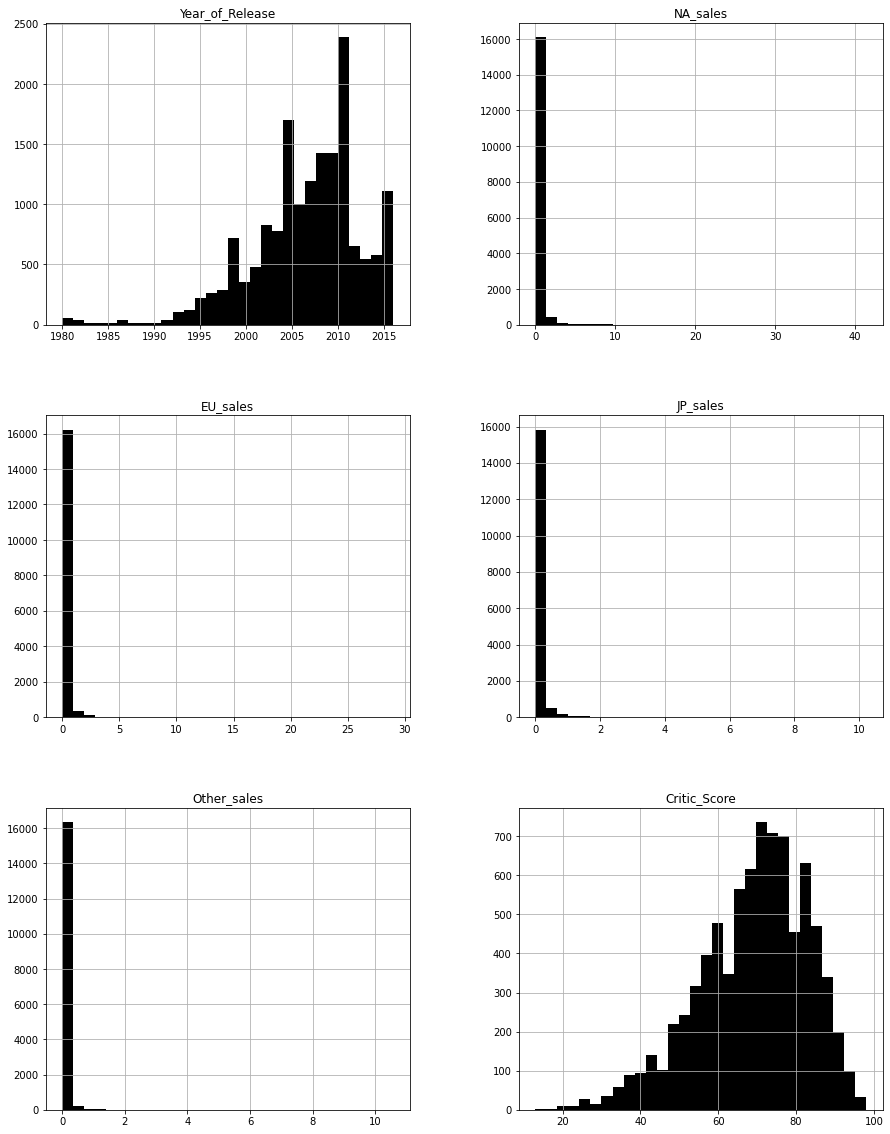

In [4]:
data.hist(bins=30,figsize=(15, 20), color = 'black');

*As can be seen from the histograms, the largest number of releases occurred between 2002 and 2011, there is also a peak in 2016, and the critics' ratings are very favorable and skewed to the right, with a predominance of 7 points.*

*Let's call the "describe" and "info" methods to continue our acquaintance with the data*

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


*From this table it can be seen that, first of all, it is necessary to understand what the minimum sales and the first quartile at around 25% are associated with, whether these are emissions, the question also arises of the median value in Japan (0.00) and the rest of the world (0.01), perhaps some games were released exclusively in North America and Europe. Accordingly, we need to create a new column with total sales in the world and check them for anomalies.* 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*The column names have to be converted to "snake" case, also the values of the User_Score column should be changed to float, Year_of_Release to int. Let's make a graph for the missing values*

In [7]:
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16, color = 'red')
        .set_title('Data content with gaps' + "\n", fontsize = 22, color = 'Blue')    
    );    

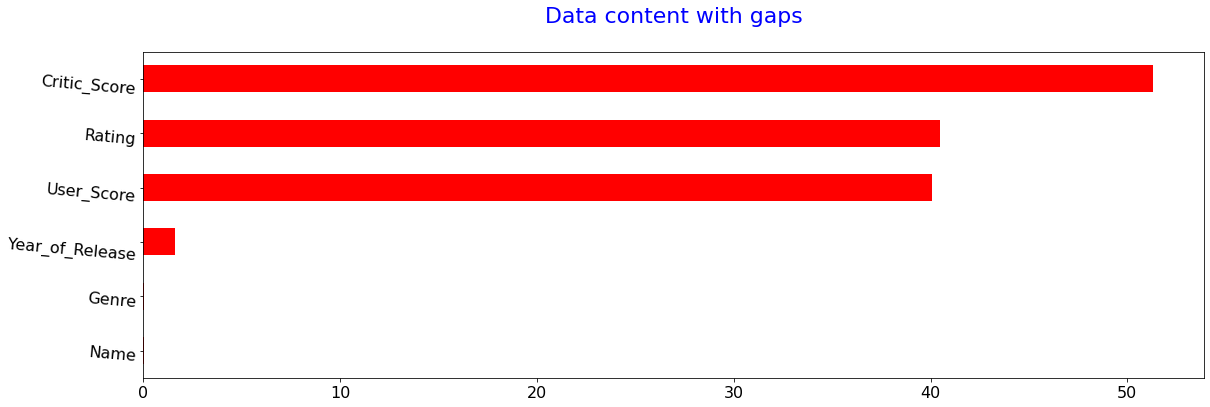

In [8]:
pass_value_barh(data)

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
The data contains 16715 rows, the columns need to be renamed because they contain capital letters, it is necessary to make something with possible anomalies in the sales data, for this, it is necessary to count the sales worldwide, it is also necessary to handle gaps and missing values in the Critic_Score, Rating, User_Score, Year_of_Release columns.

## 2. Data preprocessing ##

*We need to get rid of duplicates, find implicit duplicates, rename columns, change the data type where necessary, look for gaps and missing values in the data, perhaps fill in those gaps that do not affect the nature of the data, and get rid of those gaps that are not important for the task at hand.* 

*Rename the columns to the appropriate snake case with the rename() method*

In [9]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
data = data.rename(columns = {'Name':'name', 
                            'Platform':'platform', 
                            'Year_of_Release':'year_of_release',
                            'Genre':'genre',
                            'NA_sales':'na_sales',
                            'EU_sales':'eu_sales',
                            'JP_sales':'jp_sales',
                            'Other_sales':'other_sales',
                            'Critic_Score':'critic_score',
                            'User_Score':'user_score',
                            'Rating':'rating'})


In [11]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

*The check showed that the names have the proper form.*

*Let's get rid of duplicates, start with obvious duplicates, and first find their number*

In [12]:
data.duplicated().mean()

0.0

*The obvious duplicates are absent in the data.*


*Let's try to identify implicit duplicates in the platform, genre, and rating columns with the object data type and process them.*

In [13]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [15]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

*No implicit duplicates were found.*

*Let's get rid of gaps in the data*

In [16]:
data.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

In [17]:
data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

*As we can see from the tables, we find more than half of the data gaps in the columns with critics' and users' ratings, it is useless to fill them with medians since there are a lot of gaps, then the data will be greatly distorted, and we need them for exploratory analysis, so it's better to fill in these data" stubs", for example, "55.5", to save as much data as possible without distorting it, and also to prevent subsequent deletion, when filtering in the pandas library; <br/>
fill in the gaps in the 'rating' column with the string "unknown", since this column contains string values, and this will not affect the data and filtering;<br/>
Missing values in the name 'genre' can be removed because it's 2 to 4 table rows and it won't affect anything;<br/>
gaps in 'year_of_release' are a significant part of the data. Also, the year of the issue is important for the analysis in the future, so a more thorough analysis is required and will be processed in more detail.*

*Filling critic_score, user_score with stubs "55.5"<br/>First, let's check for such values in the 'critic_score' column.*

In [18]:
data[data['critic_score'] == 55.5]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [19]:
temp = ['critic_score', 'user_score']
def filling_data(t):
  data[t] = data[t].fillna (55.5)

filling_data (temp) 

In [20]:
data[data['critic_score']!=55.5]['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

*Fill in the gaps in the 'rating' column with the strings "unknown"*

In [21]:
data['rating'] = data['rating'].fillna ('unknown')

*We check the lines with gaps in 'name' and 'genre' and delete them if there are no additional important data*

In [22]:
data[(data['name'].isna()==True)|(data['genre'].isna()==True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,55.5,55.5,unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,55.5,55.5,unknown


*Since these are only two lines, and the data in the remaining columns is also not informative, we believe that we can delete them* 

In [23]:
data = data.dropna(subset=['name', 'genre'])

*Let's check our work*

In [24]:
data[(data['name'].isna()==True)|(data['genre'].isna()==True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


*Dealing with gaps in the 'year_of_release' column. First, let's try to make a summary table of missing values, depending on the platforms, and save it in the platform_check variable.*

In [25]:
platform_check = data[data['year_of_release'].isna()==True].groupby('platform')['platform'].agg(['count', 'max']).reset_index()

In [26]:
platform_check

,platform,count,max
0,2600,17,2600
1,3DS,8,3DS
2,DS,30,DS
3,GB,1,GB
4,GBA,11,GBA
5,GC,14,GC
6,N64,3,N64
7,PC,17,PC
8,PS,7,PS
9,PS2,34,PS2


Since the gaps in the year of release of games are only 1.6%, we will also remove them using dropna()

In [27]:
data = data.dropna(subset=['year_of_release'])

*Let's check*

In [28]:
data[data['year_of_release'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [29]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


*Gaps are filled, and we continue the processing of the data*

*Next, we will change the data types in the columns.
Let's start with the year the game was released. Logically, the year must be an integer.*

In [31]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [32]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [33]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

*Next, we need to find out why the 'user_score' column contains the string format.*

In [34]:
data['user_score'].unique()

array(['8', 55.5, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*The data type is affected by the 'tbd' value, which means that there are not enough user scores to make the sample valid. Therefore, we will display all lines with this value.*

In [35]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,55.5,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,55.5,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,55.5,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,55.5,tbd,E


*There are 2424 such rows, that is, 14.5% of the entire data frame, so we cannot get rid of them. I consider it necessary to process these values in the future. Therefore, we will convert the column values to float format, and replace the tbd value with "55.5" stubs.*

In [36]:
data['user_score'] = data['user_score'].replace('tbd','55.5')

In [37]:
data['user_score'].unique()

array(['8', 55.5, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '55.5', '8.8', '6.9', '9.4',
       '6.8', '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2',
       '6', '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [38]:
data[data['user_score']!=55.5]['user_score'].describe()

count     9839
unique      96
top       55.5
freq      2376
Name: user_score, dtype: object

In [39]:
data['user_score'] = data['user_score'].astype('float')

In [40]:
data['user_score'].unique()

array([ 8. , 55.5,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


##3. Adding calculation parameters##

*Let's create a new column 'worldwide_sales' with total sales from the whole world and check it for anomalies and outliers.*

In [42]:
data['worldwide_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

*Check the data from new column.*

In [43]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,worldwide_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,55.5,55.5,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,55.5,55.5,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,55.5,55.5,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,55.5,55.5,unknown,28.31


count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: worldwide_sales, dtype: float64

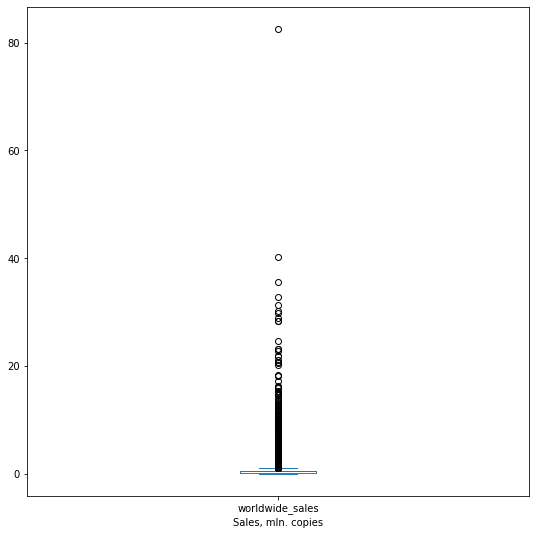

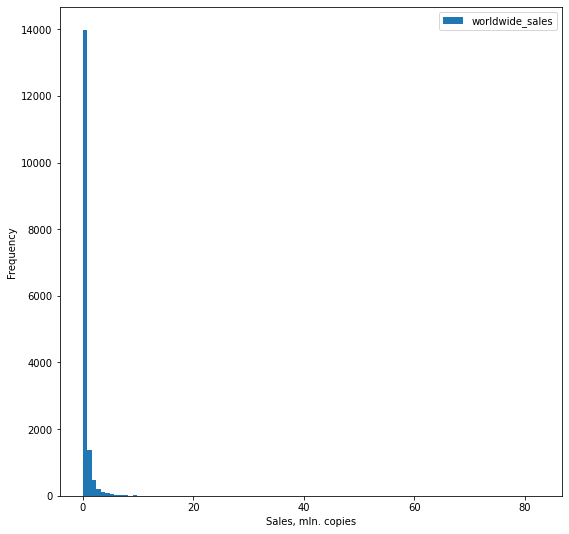

In [44]:
desc = data['worldwide_sales'].describe()
data.plot(kind='box', y='worldwide_sales', figsize=(9,9)).set_xlabel('Sales, mln. copies')
data.plot(kind='hist',y='worldwide_sales', figsize=(9,9), bins=100).set_xlabel('Sales, mln. copies')
desc

*Нулевые продажи являются явной аномалией,  выведем их* 

In [45]:
data[data['worldwide_sales'] == 0.000000]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,worldwide_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,55.5,55.5,unknown,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,55.5,55.5,unknown,0.0


*There are two games from 2008 that no one played, let's get rid of them*

In [46]:
data = data[data['worldwide_sales']!= 0.000000]

*Let's see how important the maximum sales value of 82.540000 million is for us, and also look at the top 10 most profitable games.*

In [47]:
data.sort_values(by='worldwide_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,worldwide_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,55.5,55.5,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,55.5,55.5,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,55.5,55.5,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,55.5,55.5,unknown,28.31


*According to open sources, the game "Wii Sports" did earn this money, however, it makes a very big influence on our average, because the closest competitor "Super Mario Bros" earned half as much. We decide to leave the data unchanged since it is important for us to find indicators of successful games.*

In [48]:
data['worldwide_sales'].describe()

count    16442.000000
mean         0.536089
std          1.558869
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: worldwide_sales, dtype: float64

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**
We got rid of four rows with anomalies and gaps in the title and genre of the game, filled in the gaps, kept the data as close to the original as possible, checked the data frame for duplicates, considered abnormally high sales values, and changed the column names. Data processed and ready for exploratory analysis.   

In [49]:

# Checking data
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': quantity NaN',temp[col_l].isna().sum(),
        ', % NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  float64
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
 11  worldwide_sales  16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## 4.Exploratory data analysis##

*In this part, we will conduct the following studies:*<br/>
- Determine how many games were released in different years <br/>
- Let's see how sales have changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by years. <br/>
- We will select the most relevant and significant data, data for the relevant current period. Let's define this period.<br/>
- Determine which platforms are leading in sales, growing, or falling. Let's choose some potentially profitable platforms.<br/>
- Let's see how the reviews of users and critics affect sales within one popular platform. <br/>
- Let's look at the general distribution of games by genre. Let's conclude the most profitable genres.<br/>
- Define for the user of each region (NA, EU, JP):<br/>
Most popular platforms (top 5)<br/>
Most popular genres (top 5)

*4.1 Release of the games in different years*

*To determine how many games were released depending on the year, let's make a pivot table and create the appropriate histogram.* 

In [50]:
data.groupby('year_of_release')['name'].agg(['count']).reset_index().sort_values(by = 'count',ascending = False)

,year_of_release,count
29,2009,1426
28,2008,1425
30,2010,1255
27,2007,1197
31,2011,1136
26,2006,1006
25,2005,939
22,2002,829
23,2003,775
24,2004,762


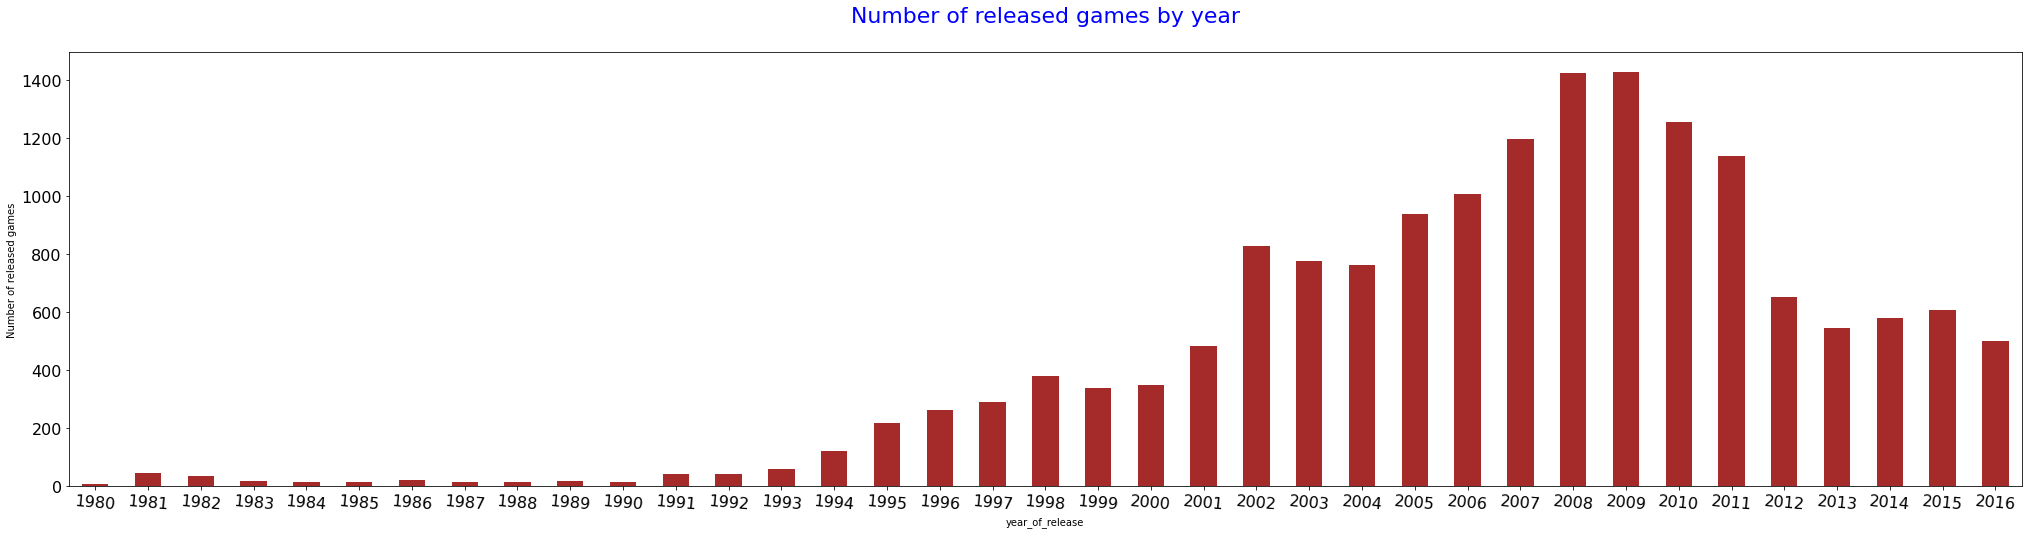

In [51]:
(data
    .groupby('year_of_release')['name'].count()
    .plot(kind = 'bar', x='count', y='year_of_release', figsize=(35,8), rot = -5, legend = False, fontsize = 16, color = 'brown', ylabel='Number of released games')
    .set_title('Number of released games by year' + "\n", fontsize = 22, color = 'Blue')
    
); 

*As can be seen from the data, before 1994, less than a hundred games were released a year, after 94, there is an increase several times, and interest in computer games grows until 2008-2009 when almost 1,500 games are released. Then there is a decline. We also see that in recent years, interest in games has noticeably decreased, and the number of games released is comparable to the beginning of 2000, about 500 per year. <br/>
Considering progress, graphics, new platforms, and demanding users, data before 1994 is insignificant. Also, data before 2000 has to be compared with sales. How important they are to us, we will consider further.*

*3.4.2. Sales by the platforms*

*Let's see how sales depend on the platforms. Let's create a pivot table. Let's choose the most popular and profitable platforms. Let's choose the platforms with the highest total sales and plot the distribution by years.*

In [52]:
platforms =(
    data
    .pivot_table(index='platform', values='worldwide_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='worldwide_sales', ascending = False)
)

In [53]:
platforms.head(10) 

,platform,worldwide_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


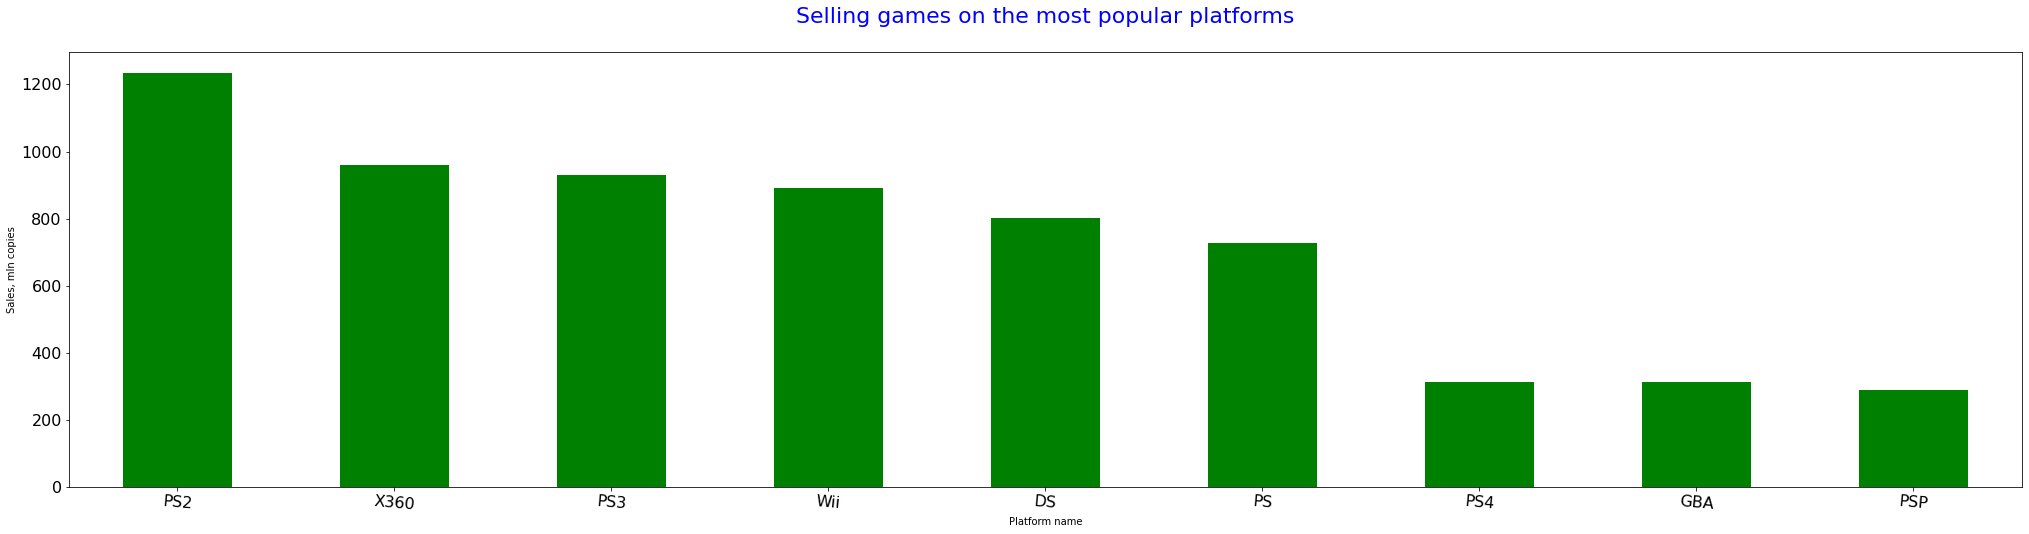

In [54]:
(
    platforms[platforms['worldwide_sales']>=259.52]
    .plot(kind = 'bar', x='platform', y='worldwide_sales', figsize=(35, 8), rot = -5, legend = False, fontsize = 16, color = 'green',  xlabel='Platform name', ylabel='Sales, mln copies' )
    .set_title('Selling games on the most popular platforms' + "\n", fontsize = 22, color = 'Blue')
); 

*Продажи игр для PS2 выше PS4 в 4 раза,возможно, потому что PS4 сейчас только набирает популярность. Построим графики для каждой из этих платформ по годам:*

In [141]:
def platform_sales(plat):
    (
        (data[data['platform']==plat].pivot_table(index=['platform','year_of_release'], values='worldwide_sales', aggfunc='sum')
        .reset_index()
        .plot(kind = 'bar', x='year_of_release', y='worldwide_sales', figsize=(35,8), rot = -5, legend = False, fontsize = 16, color = 'pink',ylabel='Sales, mln copies')
        .set_title('Selling games on'+ '  ' + plat + "\n", fontsize = 22, color = 'Blue'))    
    );

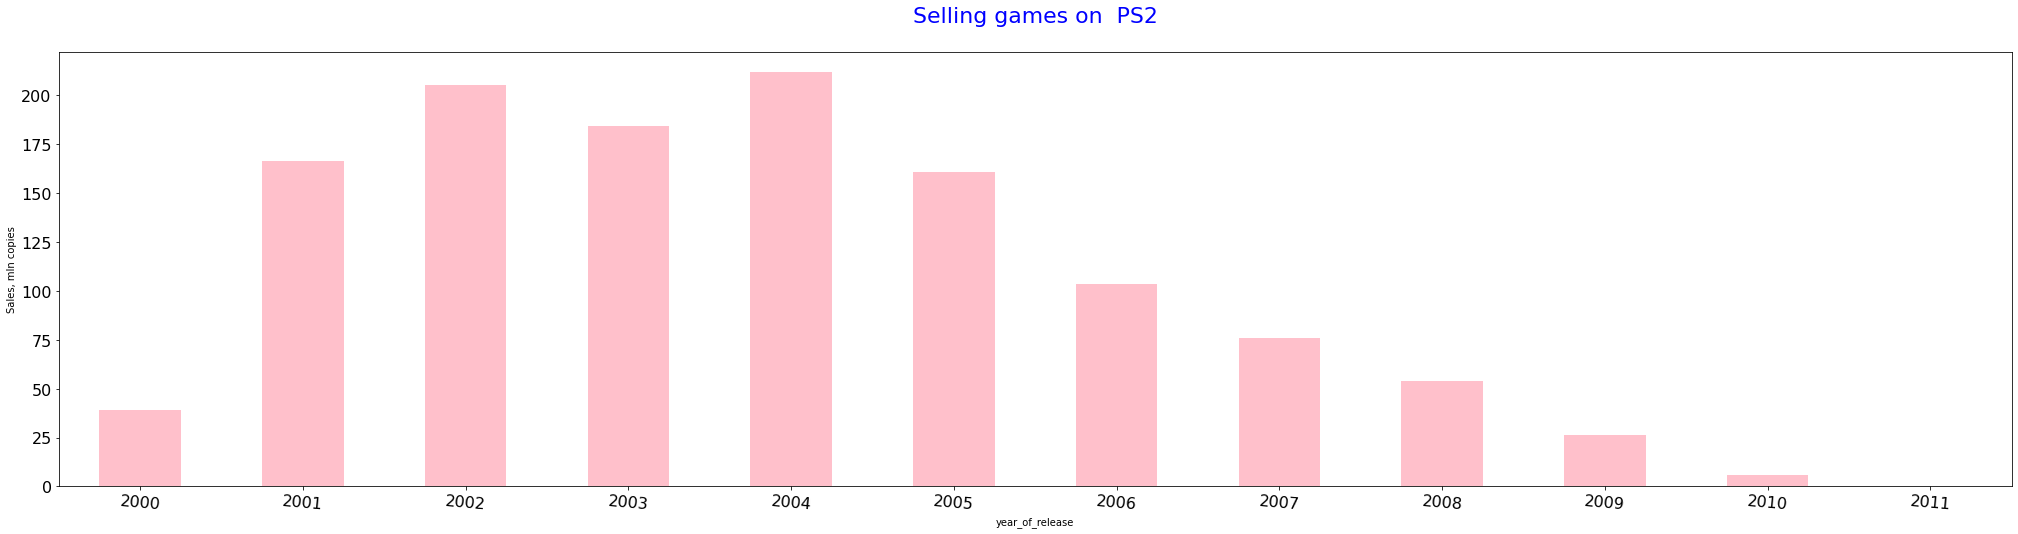

In [142]:
platform_sales ('PS2')

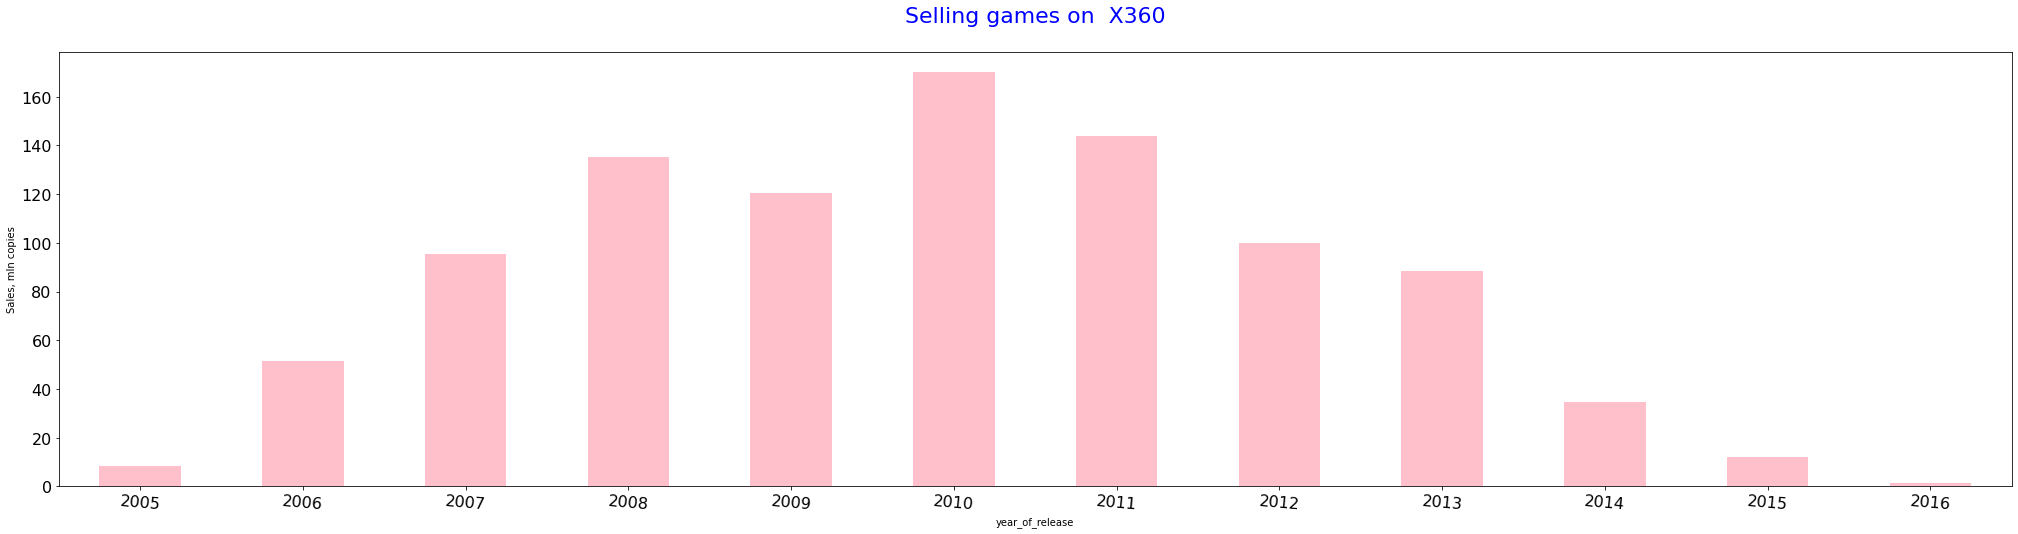

In [143]:
platform_sales ('X360')

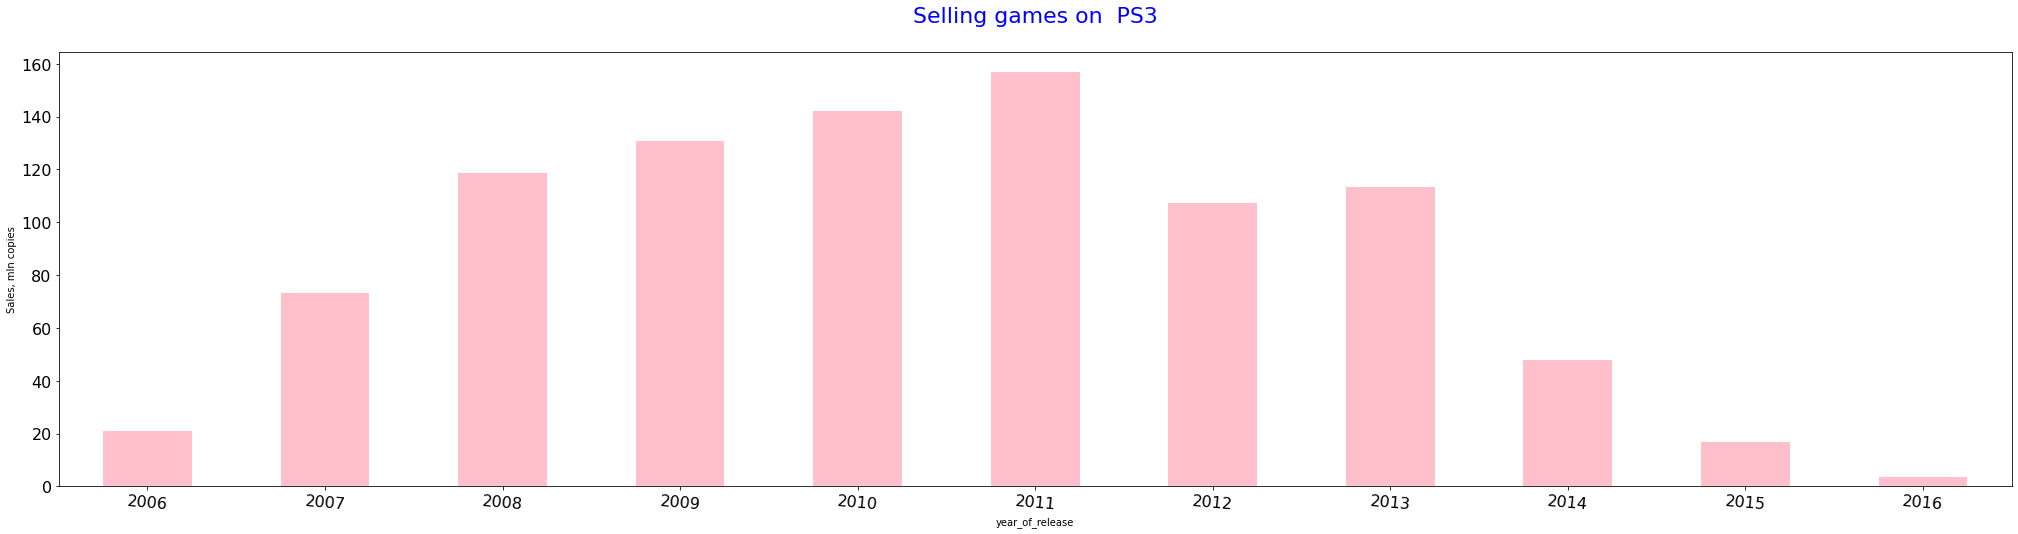

In [144]:
platform_sales ('PS3')

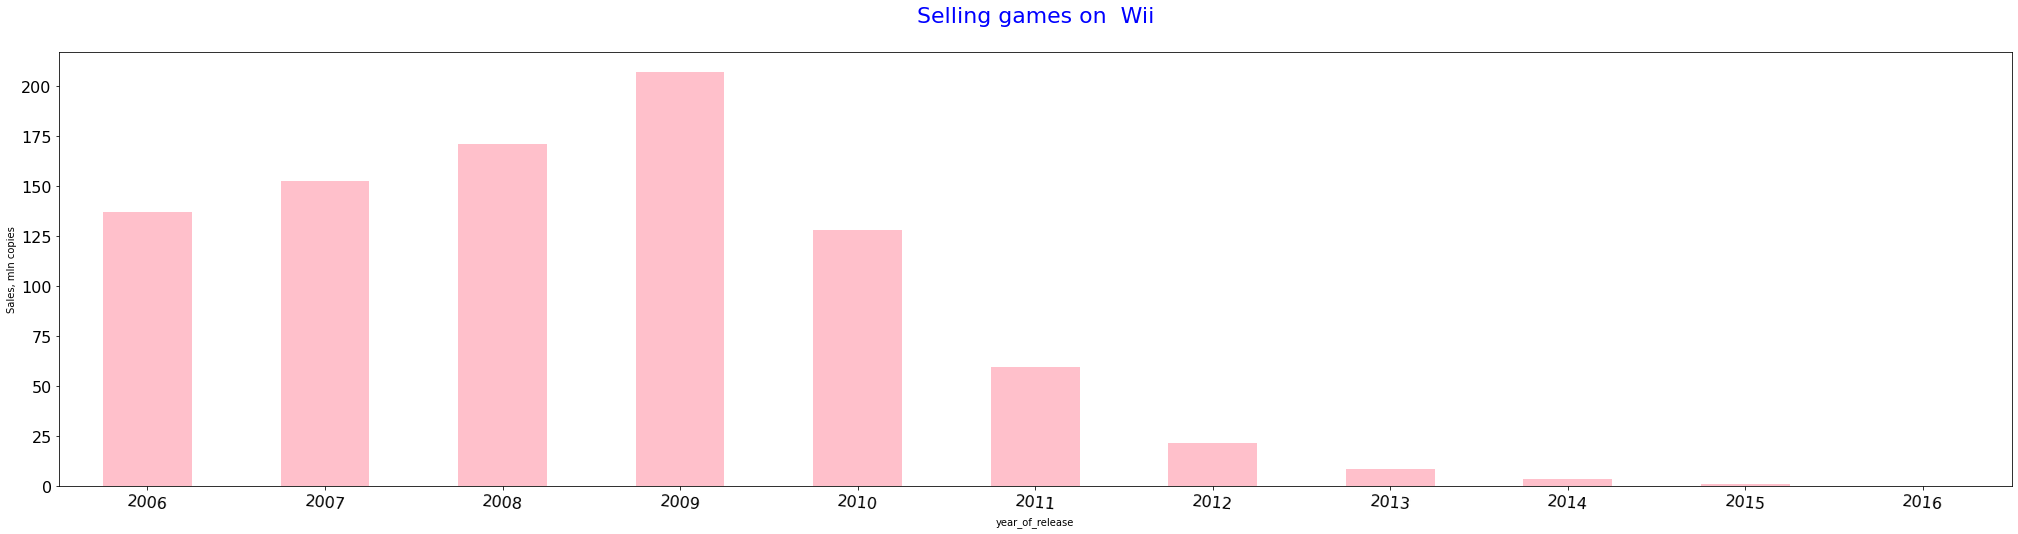

In [145]:
platform_sales ('Wii')

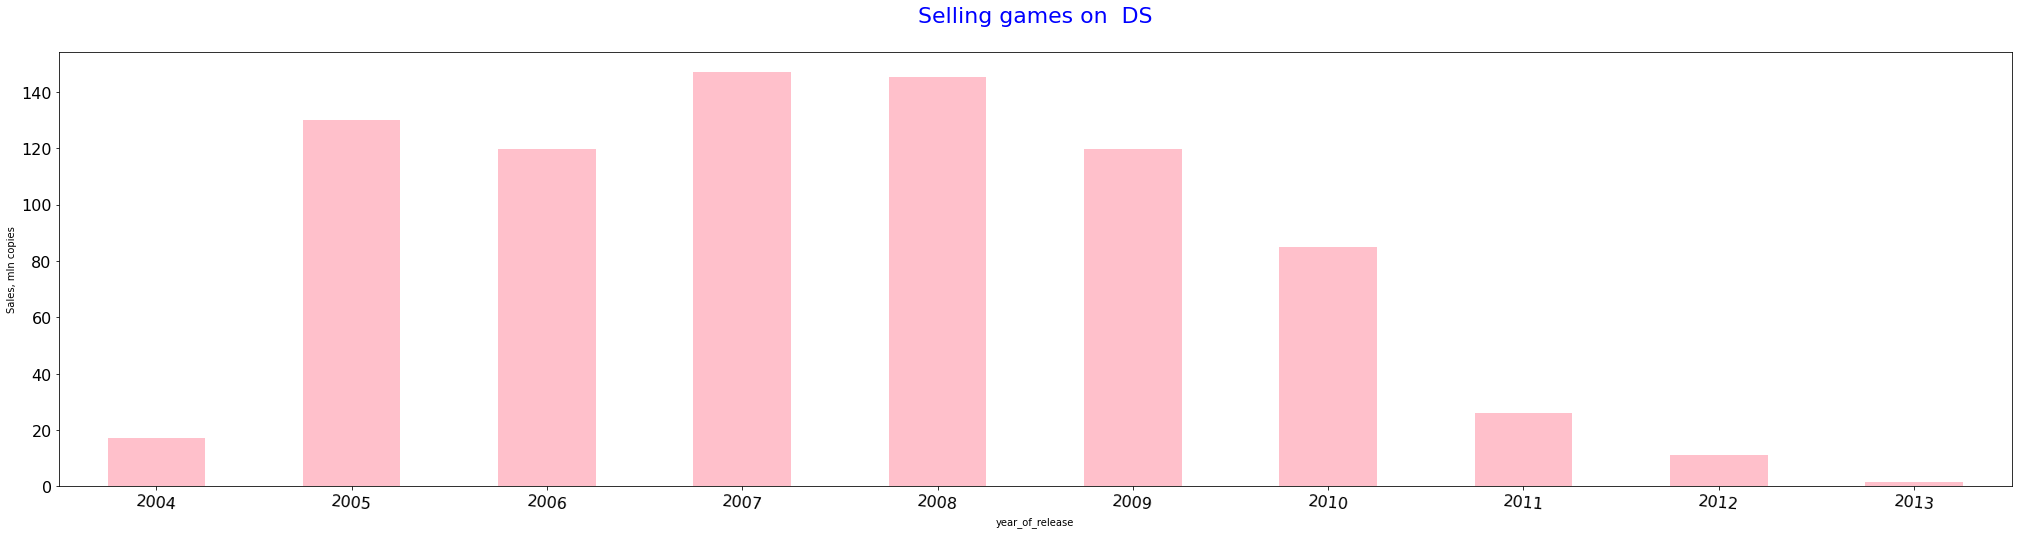

In [146]:
platform_sales ('DS')

 *Since an anomaly was found on the graph in the form of a 1985 game for a console that will be released only 15 years later, we will display it, look at it, and delete it if we see fit:* 

In [61]:
data[(data['platform']=='DS')&(data['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,worldwide_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,55.5,55.5,unknown,0.02


*With a clear conscience, we will delete it, since sales are small, localization is Japan, and there are also gaps in 'scores'*

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     16442 non-null  float64
 9   user_score       16442 non-null  float64
 10  rating           16442 non-null  object 
 11  worldwide_sales  16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [63]:
data = data[data['name']!='Strongest Tokyo University Shogi DS']

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     16441 non-null  float64
 9   user_score       16441 non-null  float64
 10  rating           16441 non-null  object 
 11  worldwide_sales  16441 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


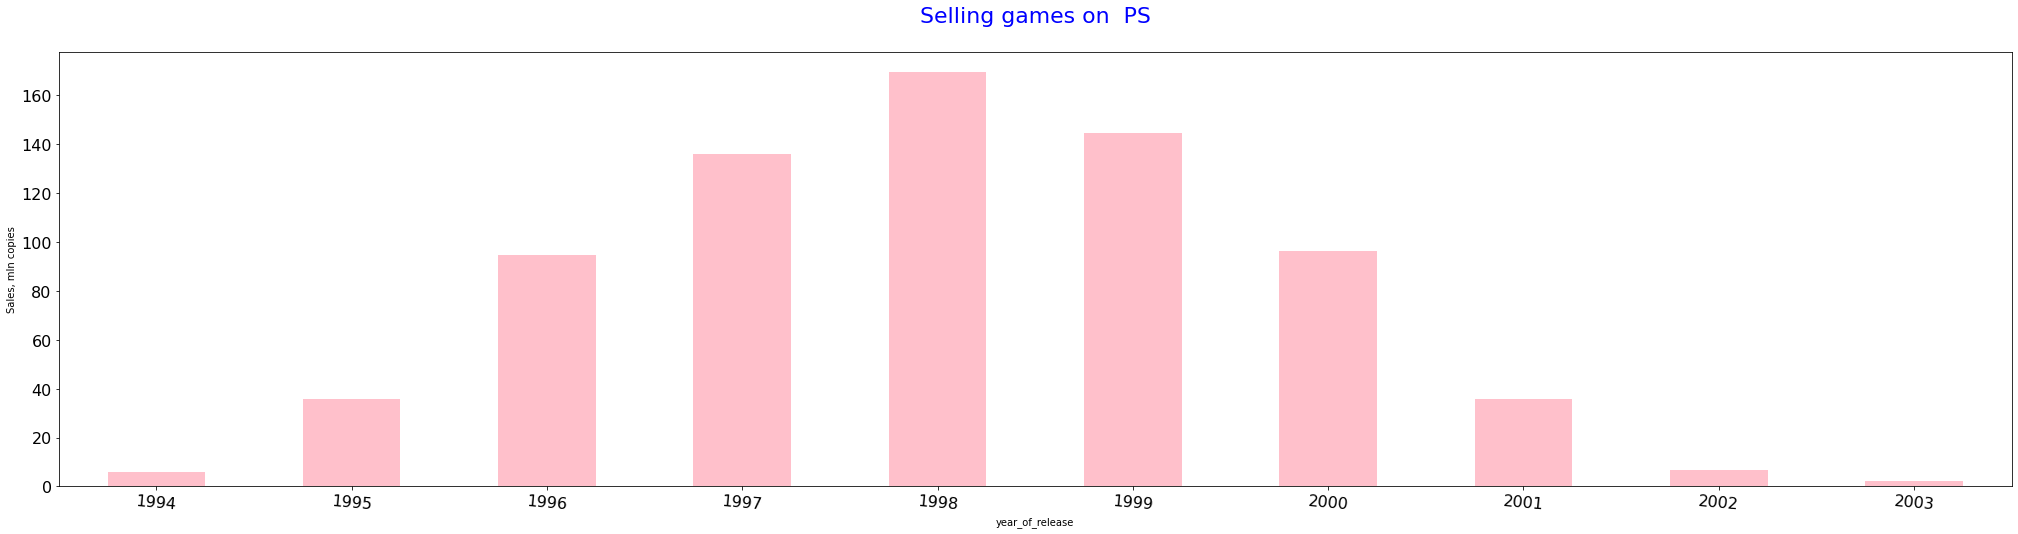

In [147]:
platform_sales ('PS')

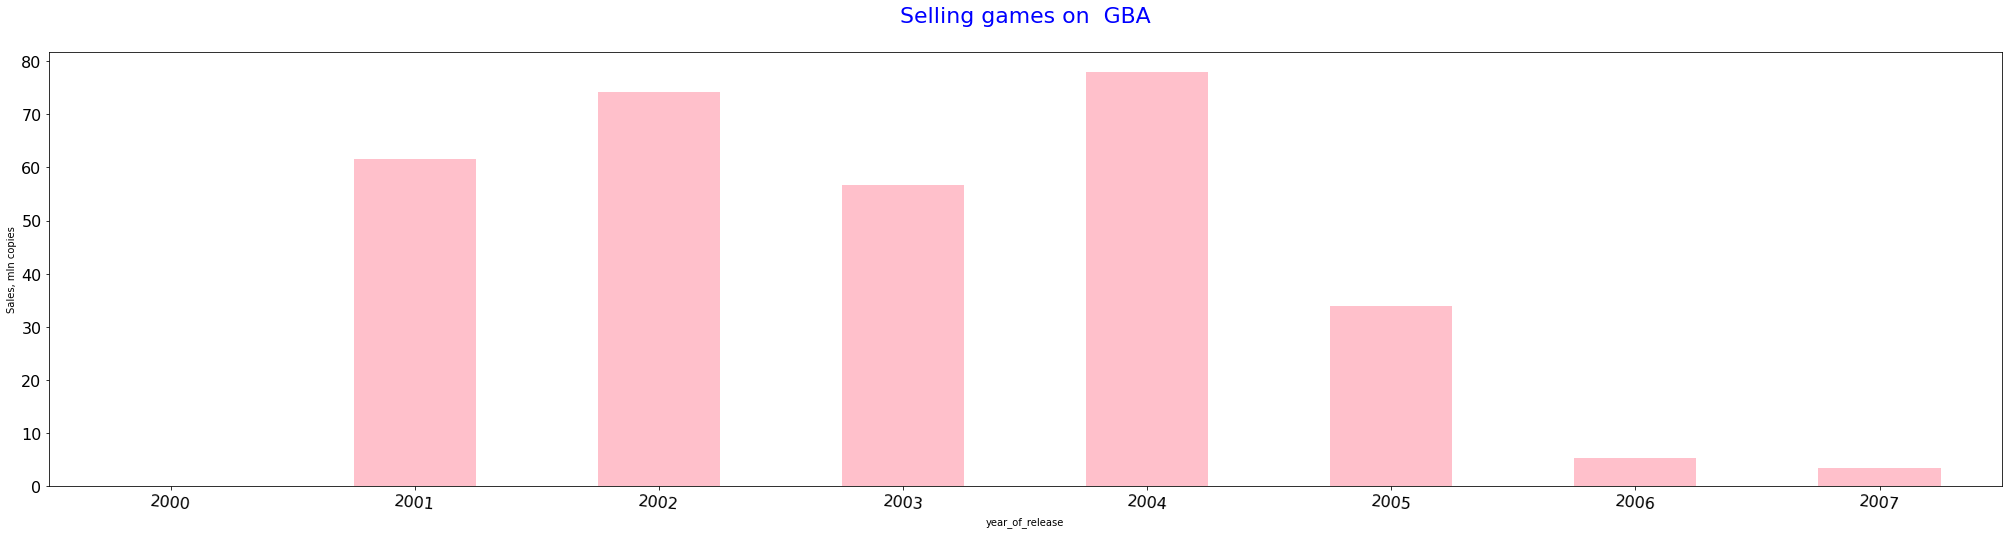

In [148]:
platform_sales ('GBA')

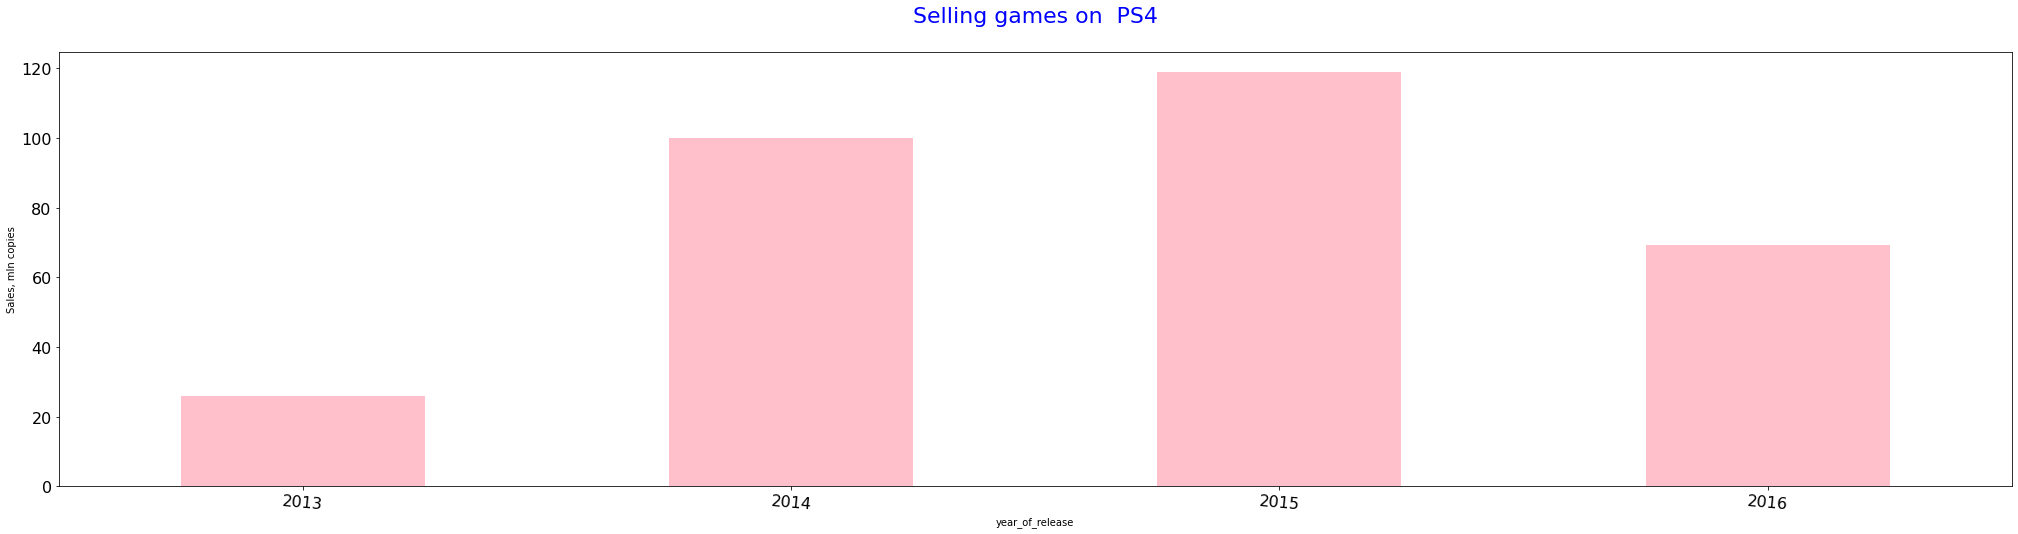

In [149]:
platform_sales ('PS4')

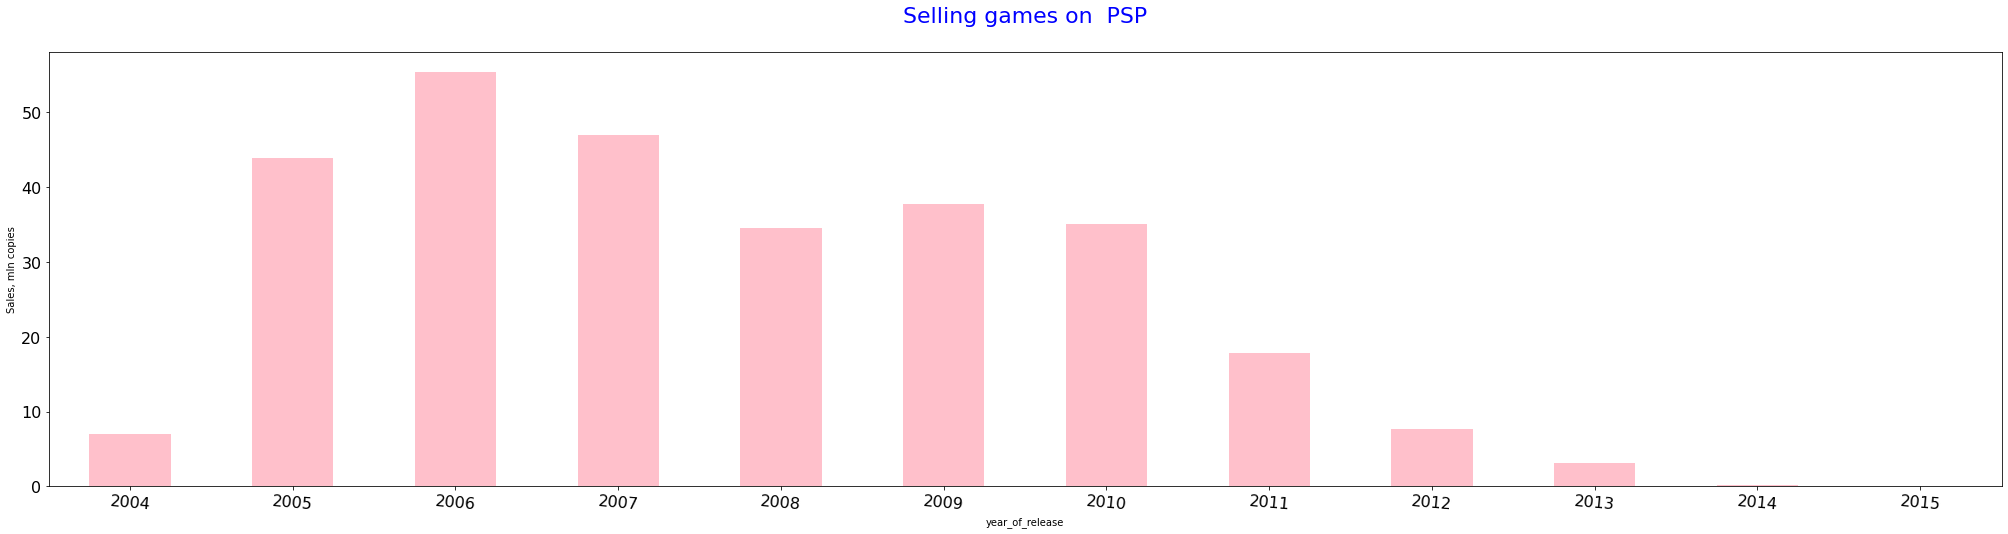

In [150]:
platform_sales ('PSP')

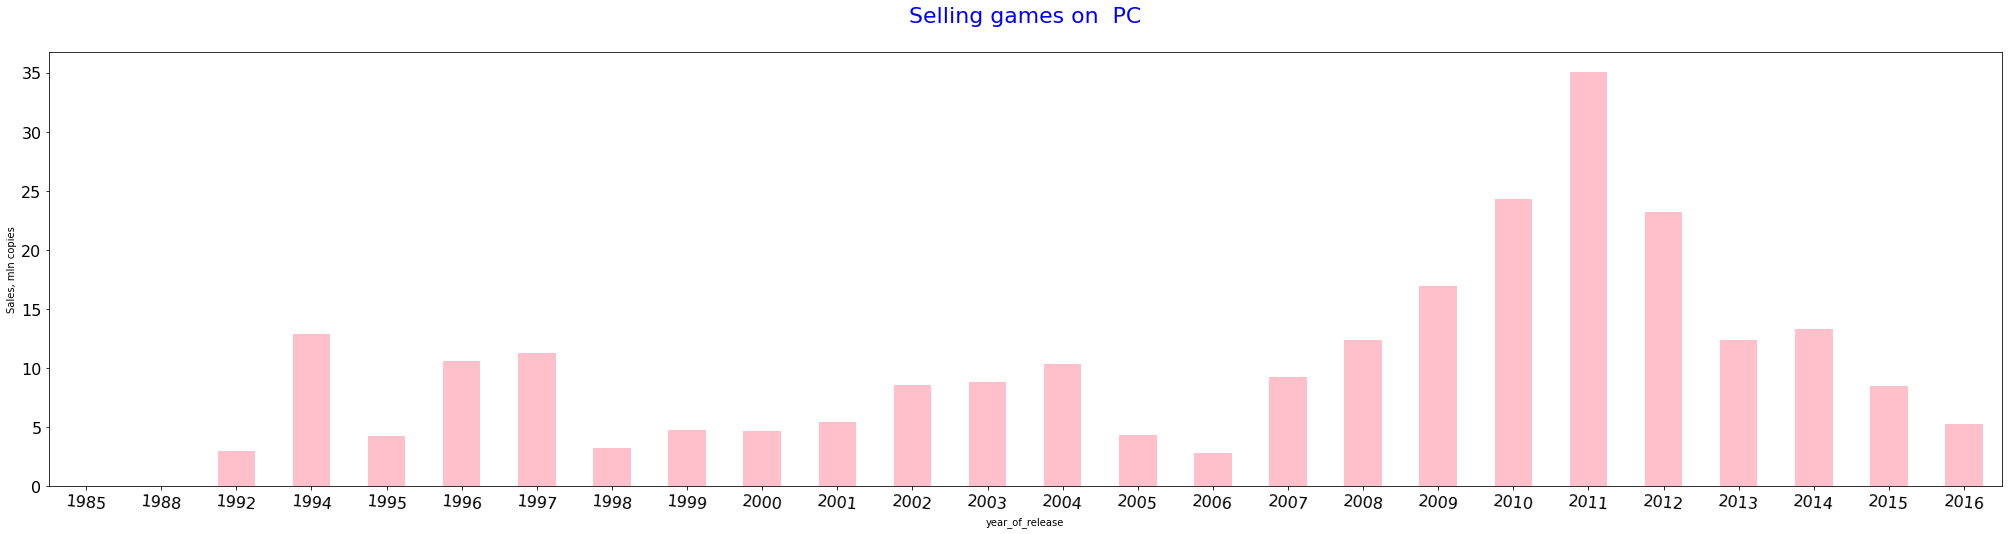

In [151]:
platform_sales ('PC')

*From the graphs, the following trends can be distinguished: for most platforms, game sales, and hence their popularity, grow in the first five years, then, for the next 5-6 years, there is a decline, and approximately two to three years after peak sales, the generation of the platform is replaced, as in the case of the PlayStation; or a competitor like the X-box comes out. Thus, the actual life span of platforms is 10-11 years<br/>
Separately, games for personal computers that are released steadily and constantly stand out, since this platform is universal and does not require a constant change of generations, and according to the sales schedule for this platform, a decline is visible, which correlates with the schedule for the release of games for all platforms.<br/>
We also note that even though there is a decline in the PS4 schedule for 2016, we remind you that the data for 2016 is not presented in full, since the year is not over, this platform shows itself to be very promising since in 4 years of existence is already in the Top 8 in terms of game sales.<br/>
Based on the foregoing, to further forecast game sales in 2017, taking into account inflation and innovations in graphics, etc., and also, our platforms should grow in popularity, then for further analysis, you should select the next ** actual period - the last 5 years, that is from 2012 to 2016**.
The next step is to cut for this period to track all current trends for this period*

*4.2. Slice of the current period 2012 -2016*

*As mentioned above, to predict sales, and select current trends in the world of games, we will cut the data and save it to a new variable act_data, and then we will work with it.*

In [70]:
act_data = data.query('year_of_release >= 2012').copy()

In [71]:
act_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     2886 non-null   float64
 9   user_score       2886 non-null   float64
 10  rating           2886 non-null   object 
 11  worldwide_sales  2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


In [72]:
act_data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,worldwide_sales
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,2013.916840,0.204771,0.175613,0.066729,0.054109,63.118503,29.578101,0.501223
std,1.411766,0.566696,0.505346,0.241575,0.164639,11.949924,24.417441,1.249157
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,55.500000,6.900000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,55.500000,8.500000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,73.000000,55.500000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,55.500000,21.050000


In [153]:
print('Number of platforms in the data frame: ', data['platform'].nunique())
print('Number of platforms relevant in 2012-2016: ', act_data['platform'].nunique())

Number of platforms in the data frame:  31
Number of platforms relevant in 2012-2016:  11


*On one hand, we lost most of the data, on the other hand, we made the data relevant by getting rid of outdated trends, and the number of potential platforms worth selling games on was reduced from 31 to 11.*

*4.3. Selection of leading platforms for the relevant period*

*Let's consider which platforms are leading in sales, growing, or falling in 2006-2016. Let's select several potentially profitable platforms. To do this, we first group the corresponding table by sales of games on platforms.*

In [74]:
platforms =(
    act_data
    .pivot_table(index='platform',columns='year_of_release', values='worldwide_sales', aggfunc='sum')
    .reset_index()

)

In [75]:
platforms

year_of_release,platform,2012,2013,2014,2015,2016
0,3DS,51.36,56.57,43.76,27.78,15.14
1,DS,11.01,1.54,NaN,NaN,NaN
2,PC,23.22,12.38,13.28,8.52,5.25
3,PS3,107.36,113.25,47.76,16.82,3.60
4,PS4,NaN,25.99,100.00,118.90,69.25
5,PSP,7.69,3.14,0.24,0.12,NaN
6,PSV,16.19,10.59,11.90,6.25,4.25
7,Wii,21.71,8.59,3.75,1.14,0.18
8,WiiU,17.56,21.65,22.03,16.35,4.60
9,X360,99.74,88.58,34.74,11.96,1.52


''

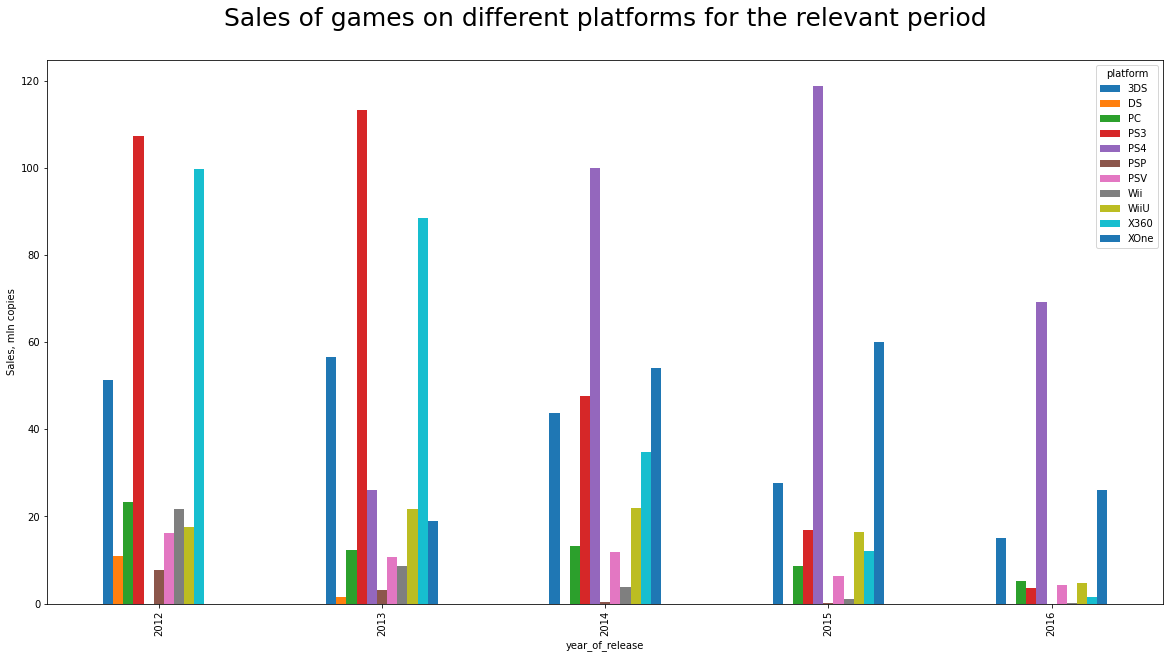

In [154]:
pltf= ['Wii', 'DS', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU', 'PSP', 'PSV']
sales_platform = act_data.query('platform == @pltf').pivot_table(index='year_of_release',
                                            values='worldwide_sales',
                                            columns='platform',
                                            aggfunc='sum')
 
sales_platform.plot(figsize=(20,10), kind='bar', ylabel = 'Sales, mln copies').set_title('Sales of games on different platforms for the relevant period' + "\n", fontsize = 25, color = 'Black')
;


In [155]:
def platform_act_sales(plat):
    (
        (act_data[act_data['platform']==plat]
        .pivot_table(index=['year_of_release'], values='worldwide_sales', aggfunc='sum')
        .reset_index()
        .plot(kind = 'bar', x='year_of_release', y='worldwide_sales', figsize=(15,3), rot = -5, legend = True,  color = 'purple', fontsize = 13, ylabel = 'Sales, mln.copies')
        .set_title('Sales of games on   '+ plat +  '  for the relevant period' + "\n", fontsize = 16, color = 'Blue'))    
    );

In [78]:
act_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

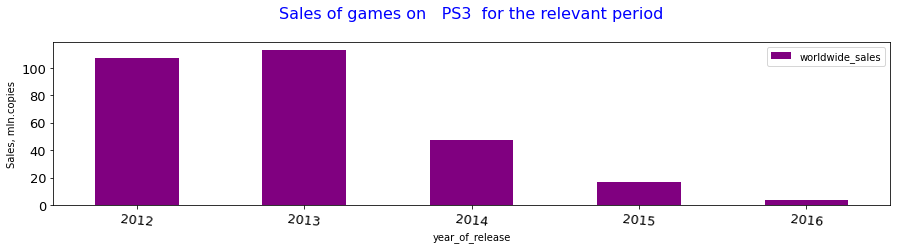

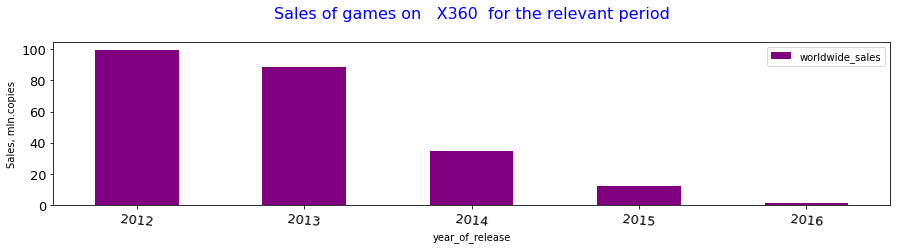

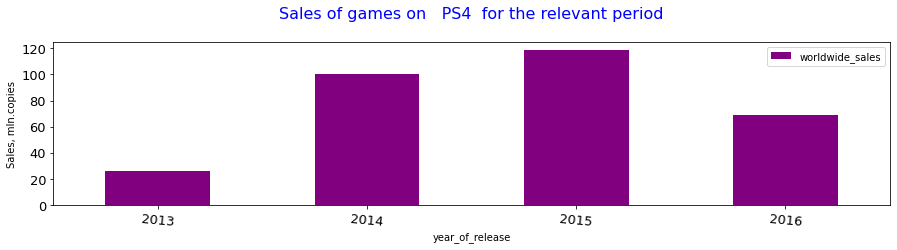

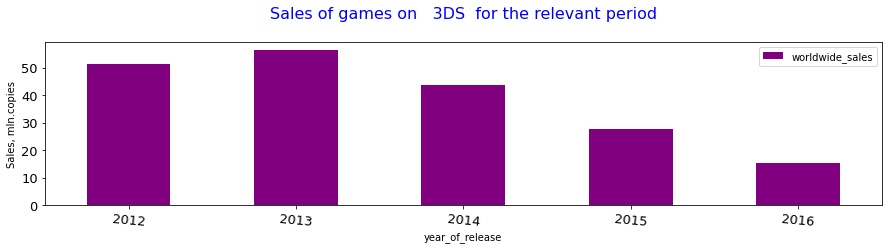

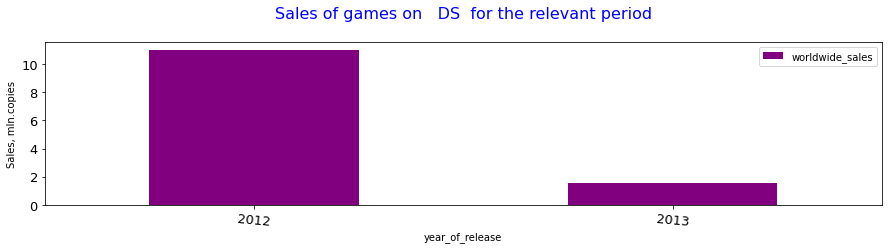

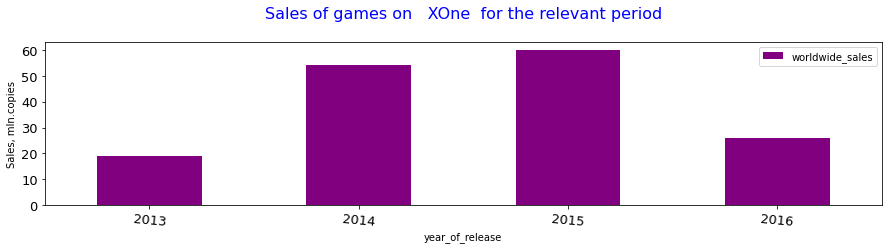

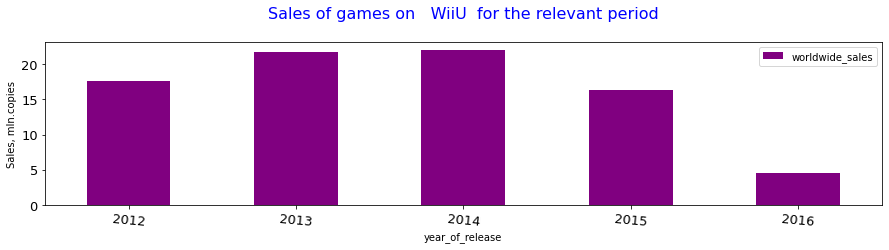

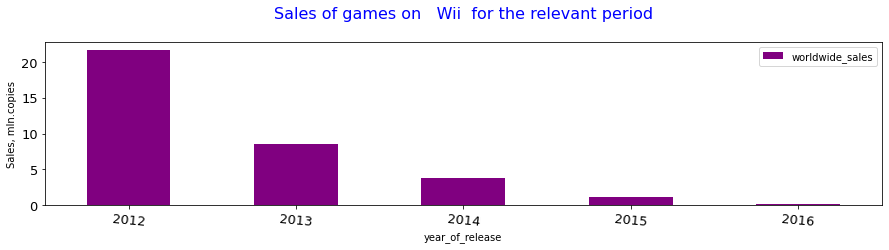

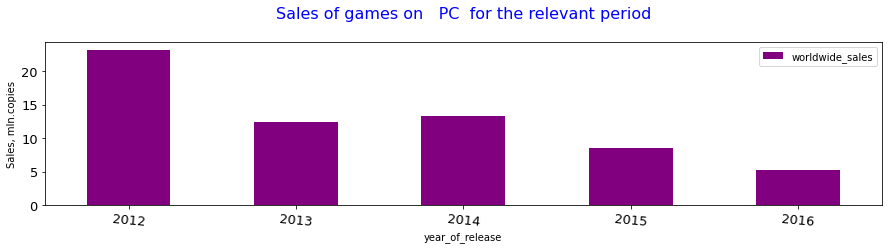

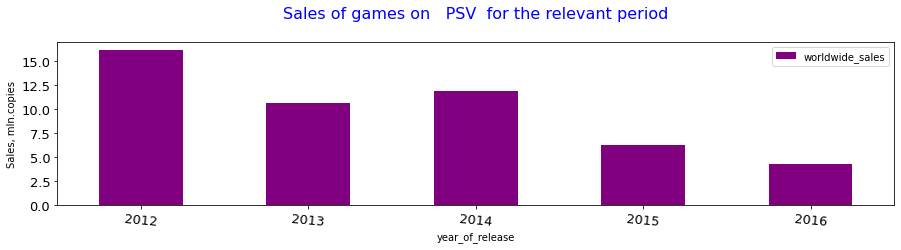

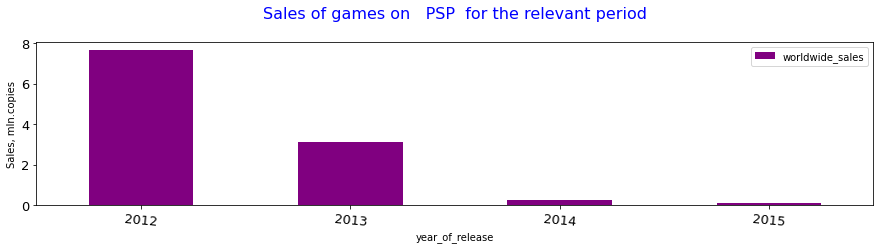

In [156]:
pltf= ['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP']
for p in pltf:
    platform_act_sales(p)

*As you can see from the table and graphs: there are profitable platforms, and there are platforms that died out already at the beginning of the current period: DS stopped making a profit from game sales at the very beginning of the current period. Sales of PS3, Wii, X360 were strong, however, these platforms are now changing generations, and according to 2016 data, sales of games for these platforms have fallen. Well, the most relevant and potentially profitable (gaining popularity) are XOne, WiiU, and PSV. <br/> Separately from them, it is worth highlighting the PS4, which is at its peak of popularity, and it has already been noted earlier, that the data confirms that the potential of this platform is higher than the rest.<br/>
The 3DS also has the potential to make good profits, but the popularity of this platform is declining.<br/>As mentioned earlier, the profits from PC games are stable and it is also important to pay attention to this platform.<br/>
As a result, we choose the most potentially profitable platforms: **PS4, XOne, WiiU, PSV, 3DS, PC** <br/>
The data on these platforms will be studied by us in more detail.*

*4.4. Data overview for selected platforms.*




*4.4.1. Let's see how global sales of games slice by platform, to assess the stability of sales on various platforms, for this, we will build range charts, make two graphs with all outliers, and with a limit on the y-axis*

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


''

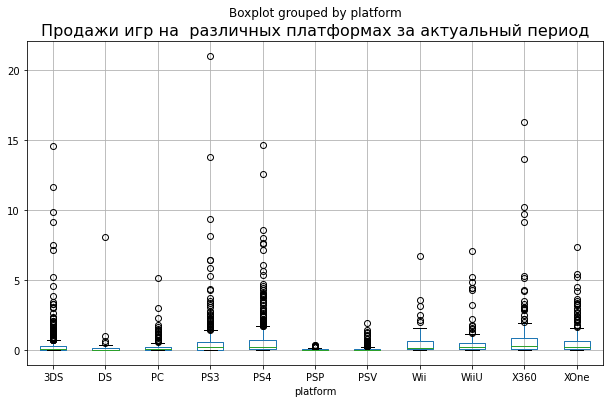

In [80]:
act_data.boxplot(column= 'worldwide_sales', by= 'platform',  figsize=(10,6)).set_title('Продажи игр на  различных платформах за актуальный период' , fontsize = 16)
;

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


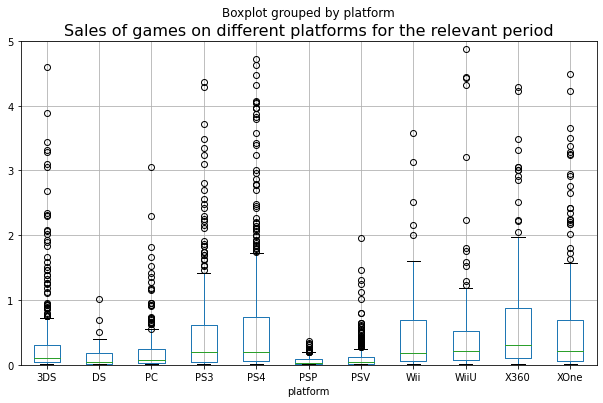

In [157]:
act_data.boxplot(column= 'worldwide_sales', by= 'platform', figsize=(10,6)).set_title('Sales of games on different platforms for the relevant period' , fontsize = 16)
plt.ylim(0, 5);

*As you can see from the first graph, PS3 and X360 have the highest outliers, which means that these platforms have hits that shoot hard<br/>
The second graph shows that the X360 has the largest range, and hence the stability of sales, followed by the PS4, followed by the XBox One and Wii. Two of these platforms, PS4 and XBox One, we have already identified as promising, so next, we will consider the most promising platforms, including those with the described method.*

*4.4.2 Consider range charts for top platforms*

In [159]:
def platform_act_sales_box(plat):
    (
        (act_data[act_data['platform']==plat]['worldwide_sales']
        .plot(kind = 'box', figsize=(5,5))
        .set_title('Sales on   '+ plat +  '  for the relevant period' + "\n", fontsize = 22, color = 'Black'))    
    );

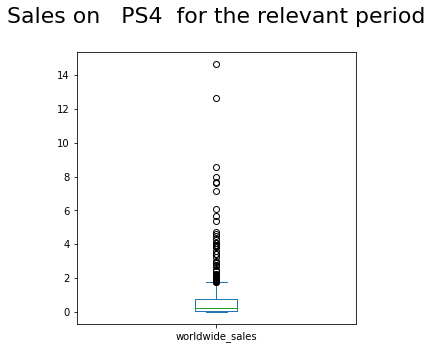

In [160]:
platform_act_sales_box('PS4')

In [84]:
act_data[act_data['platform']=='PS4']['worldwide_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: worldwide_sales, dtype: float64

*PS4 sales, as you can see from the box, vary widely. The median (0.2 million copies) is very different from the mean (0.8 million copies). 75% of the sample lies in the range of fewer than 0.73 million copies. Emissions can be considered everything that is above the limit of about 1.5 million copies. The standard deviation is quite large. Let's try to get rid of the maximum values:*

In [85]:
act_data[(act_data['platform']=='PS4') & (act_data['worldwide_sales']<12)]['worldwide_sales'].describe()

count    390.000000
mean       0.735615
std        1.322370
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max        8.580000
Name: worldwide_sales, dtype: float64

*As we can see, the mean and standard deviation decreased, while the rest of the indicators did not change.*

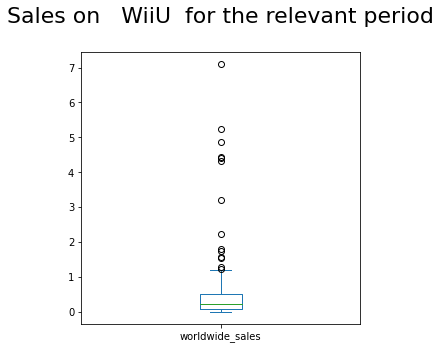

In [161]:
platform_act_sales_box('WiiU')

In [87]:
act_data[act_data['platform']=='WiiU']['worldwide_sales'].describe()

count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: worldwide_sales, dtype: float64

*WiiU sales are noticeably lower than PS4 sales. The median (0.22 million copies) is two times different from the average (0.56 million copies). 75% of the sample lies in the range of fewer than 0.53 million copies. Emissions can be considered everything that is above the limit of about 1.2 million copies. The standard deviation is quite large.*

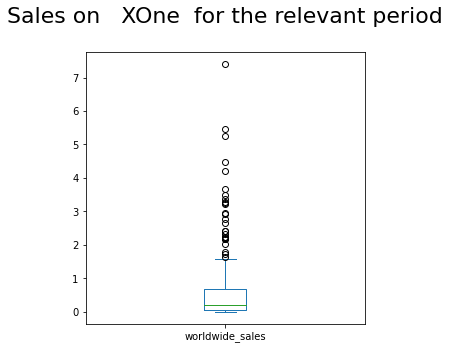

In [162]:
platform_act_sales_box('XOne')

In [89]:
act_data[act_data['platform']=='XOne']['worldwide_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: worldwide_sales, dtype: float64

*In general, the sales situation for XOne is similar to that for WiiU. However, it should be taken into account that the sample is more homogeneous (the emission limit is about 1.6 million copies). Also, the majority (75%) have more sales than WiiU, which makes the XOne platform more promising.*

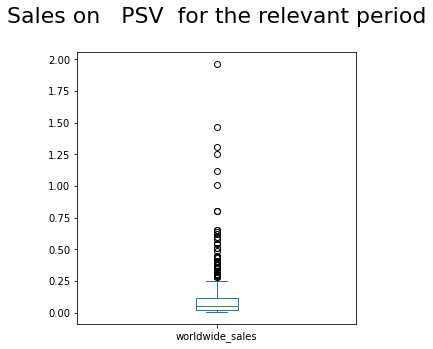

In [163]:
platform_act_sales_box('PSV')

In [91]:
act_data[act_data['platform']=='PSV']['worldwide_sales'].describe()

count    411.000000
mean       0.119659
std        0.203011
min        0.010000
25%        0.020000
50%        0.050000
75%        0.120000
max        1.960000
Name: worldwide_sales, dtype: float64

*In general, PSV sales are less successful, with 75% of the sample having less than 0.12 million copies. Even though the number of games released is much higher (411 games), which is comparable to the most popular PS4.*

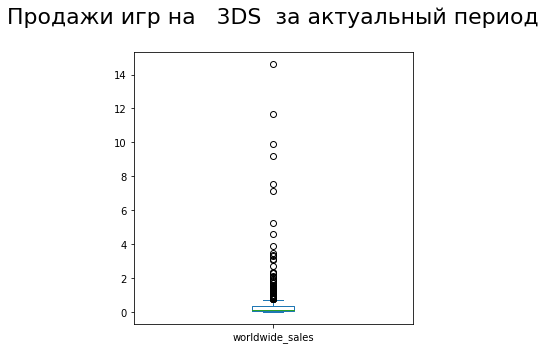

In [92]:
platform_act_sales_box('3DS')

In [93]:
act_data[act_data['platform']=='3DS']['worldwide_sales'].describe()

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: worldwide_sales, dtype: float64


*As for the sales of the 3DS platform, we can note a small distance between the quartiles, with a huge number of released games. The platform is not very promising in terms of future sales and is becoming obsolete.* 

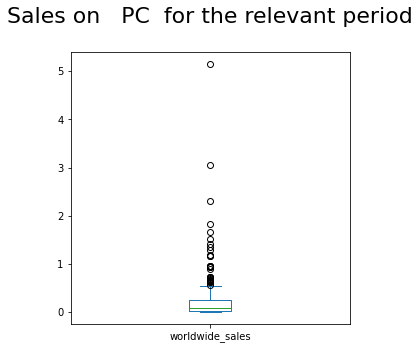

In [164]:
platform_act_sales_box('PC')

In [95]:
act_data[act_data['platform']=='PC']['worldwide_sales'].describe()

count    250.00000
mean       0.25060
std        0.49464
min        0.01000
25%        0.03000
50%        0.08000
75%        0.24000
max        5.14000
Name: worldwide_sales, dtype: float64

*The PC platform should be considered unique in terms of sales duration and number of copies. We remind you that the PC is generally a universal device that will be relevant in terms of sales for a long time. It is interesting in this case to compare it with the most promising XBox One platform, at first glance, both the averages (0.25 and 0.645) and medians (0.08 and 0.22) are very different, it is necessary to check them using statistical tests.*

*4.5. Dependence of sales on reviews from critics and users*

*Let's see how sales within the most potentially profitable PS4, XOne, WiiU, 3DS, PC are influenced by user reviews and critics. Let's build a scatterplot and calculate the correlation between reviews and sales.*

In [165]:
def correlation_critscor_pltf (platform):
    print(
    'The correlation coefficient between critic reviews and game sales on', platform,
    act_data[(act_data['platform']== platform) & (act_data['critic_score']!=55.5)]['worldwide_sales'].corr(act_data['critic_score']).round(3)
)

In [166]:
pltf =['PS4', 'XOne', 'WiiU', '3DS', 'PC']
for p in pltf:
    correlation_critscor_pltf (p)

The correlation coefficient between critic reviews and game sales on PS4 0.407
The correlation coefficient between critic reviews and game sales on XOne 0.417
The correlation coefficient between critic reviews and game sales on WiiU 0.348
The correlation coefficient between critic reviews and game sales on 3DS 0.321
The correlation coefficient between critic reviews and game sales on PC 0.237


In [181]:
def scatter_corr_crit_platform (platform):
    (
    act_data[(act_data['platform']==platform) & (act_data['critic_score']!=55.5)]
    .plot(y='worldwide_sales', x='critic_score', kind='scatter', figsize=(12, 4), alpha=0.3, xlabel='Critics score', ylabel='Worlwide sales,mln copies')
    .set_title('The correlation coefficient between game sales on '+ platform +  '  and critic reviews' + "\n", fontsize = 22, color = 'Black')    
);

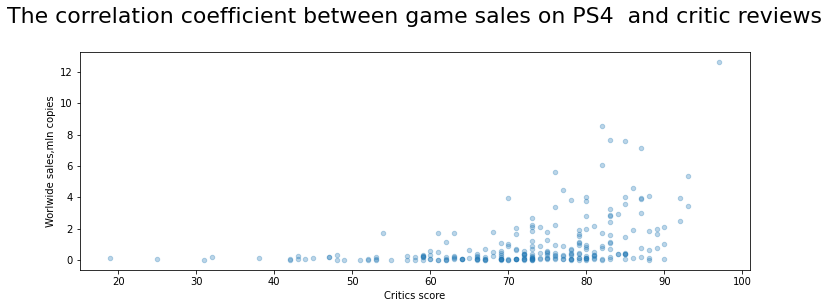

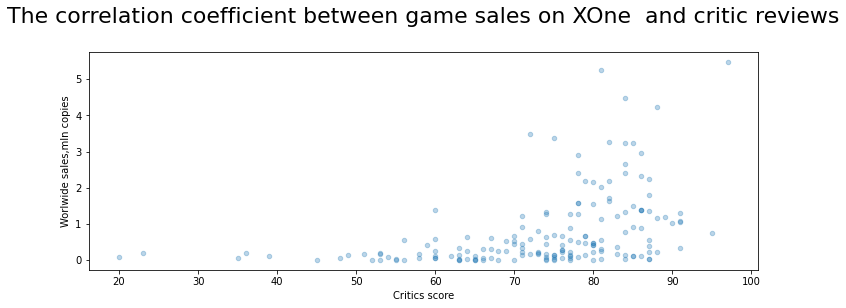

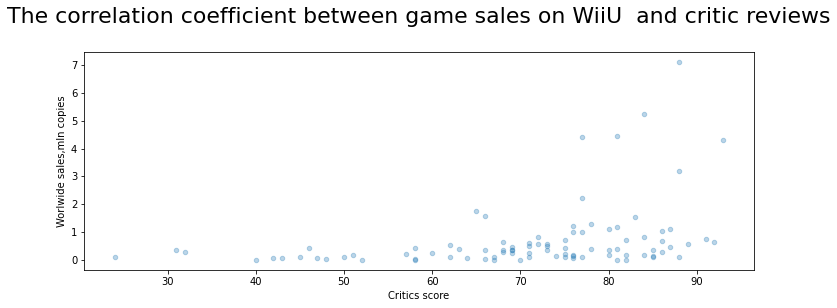

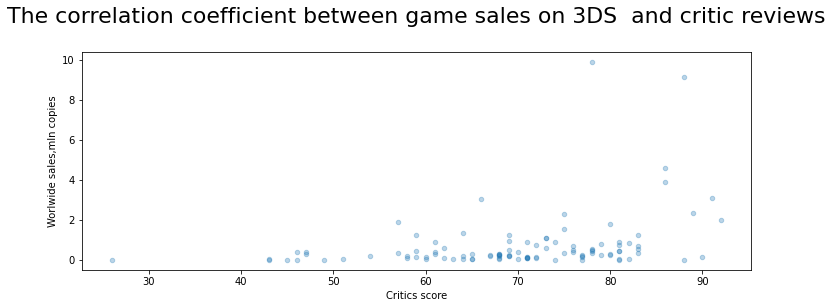

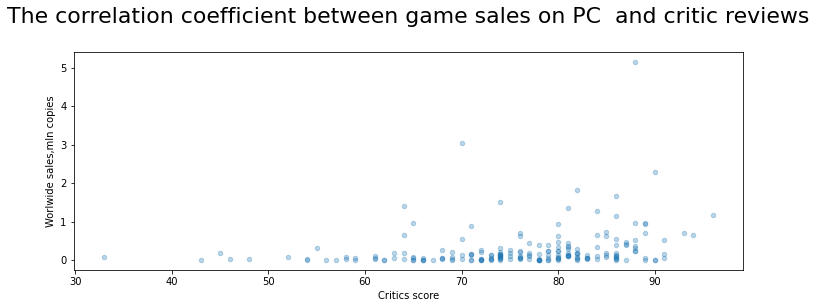

In [182]:
for p in pltf:
    scatter_corr_crit_platform (p)

*As can be seen from the correlation coefficient figures and graphs, there is no linear relationship between critical reviews and game sales. Let's try to find a connection between user ratings.*

In [169]:
def correlation_userscor_pltf (platform):
    print(
    'The correlation coefficient between user ratings and game sales on', platform,
    act_data[(act_data['platform']==platform) & (act_data['user_score']!=55.5)]['worldwide_sales'].corr(act_data['user_score']).round(3)
)

In [170]:
for p in pltf:
    correlation_userscor_pltf (p)

The correlation coefficient between user ratings and game sales on PS4 -0.032
The correlation coefficient between user ratings and game sales on XOne -0.069
The correlation coefficient between user ratings and game sales on WiiU 0.4
The correlation coefficient between user ratings and game sales on 3DS 0.198
The correlation coefficient between user ratings and game sales on PC -0.122


In [179]:
def scatter_corr_user_platform (platform):
    (
    act_data[(act_data['platform']=='PS4') & (act_data['user_score']!=55.5)]
    .plot(y='worldwide_sales', x='user_score', kind='scatter', figsize=(12, 4), alpha=0.3, xlim = (0,11), xlabel='User scores', ylabel='Worlwide sales,mln copies')
    .set_title('The correlation coefficient between  game sales on  '+ platform +  '  and user ratings ' + "\n", fontsize = 22, color = 'Black')
);

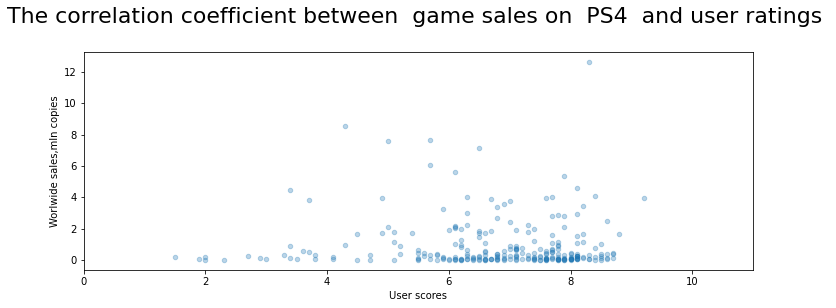

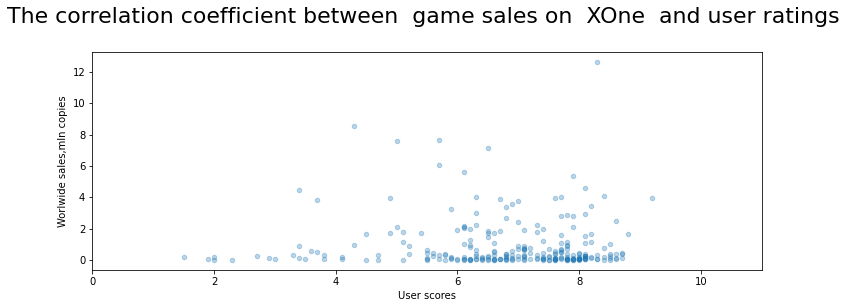

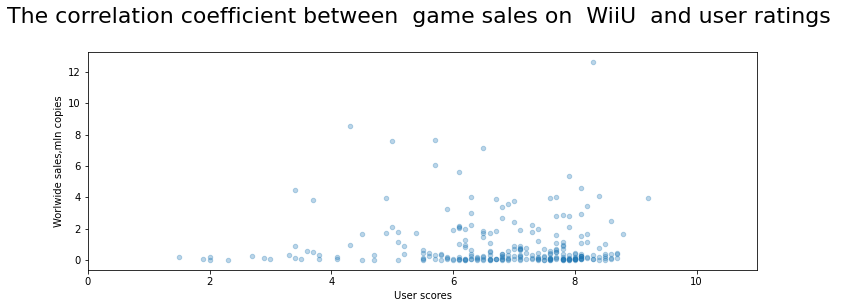

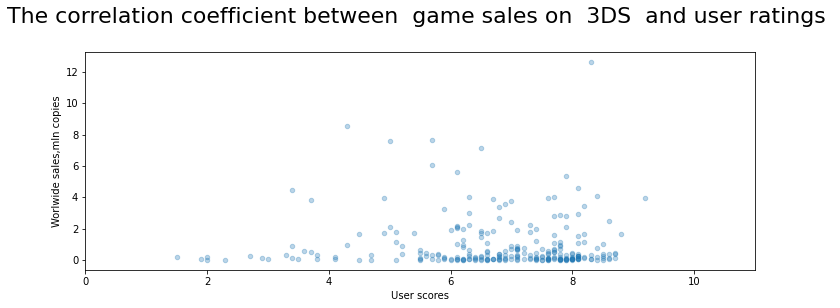

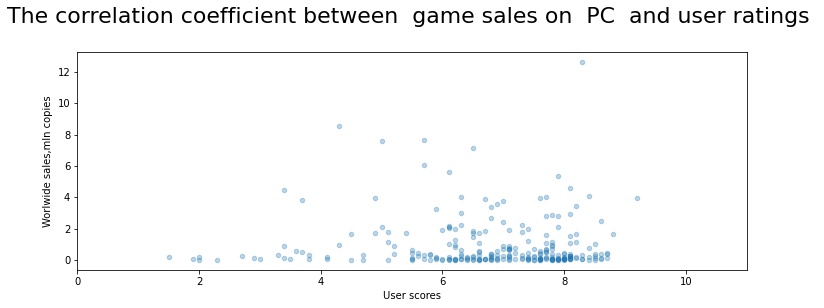

In [180]:
for p in pltf:
   scatter_corr_user_platform(p)

*The situation is similar for user ratings. The coefficient is low, there is no linear relationship between these indicators. Let's try to repeat this for the entire dataset:*

*Let's apply this principle to all platforms and check the absence of linear relationships between these parameters.*

In [177]:
print(
    'The correlation coefficient between critic reviews and game sales',
    act_data[act_data['critic_score']!=55.5]['worldwide_sales'].corr(act_data['critic_score']).round(3)
)

The correlation coefficient between critic reviews and game sales 0.308


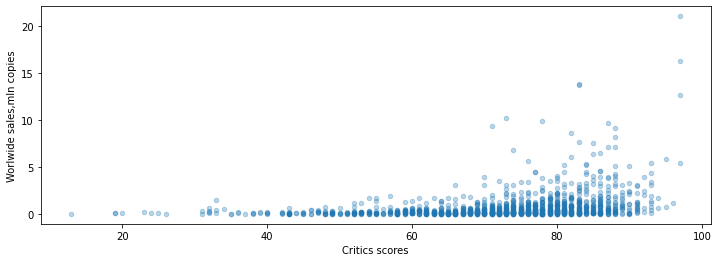

In [184]:
(
    act_data[act_data['critic_score']!=55.5]
    .plot(y='worldwide_sales', x='critic_score', kind='scatter', figsize=(12, 4), alpha=0.3, xlabel='Critics scores', ylabel='Worlwide sales,mln copies')
);

In [176]:
print(
    'The correlation coefficient between user ratings and game sales ',
    act_data[act_data['user_score']!=55.5]['worldwide_sales'].corr(act_data['user_score']).round(3)
)

The correlation coefficient between user ratings and game sales  0.004


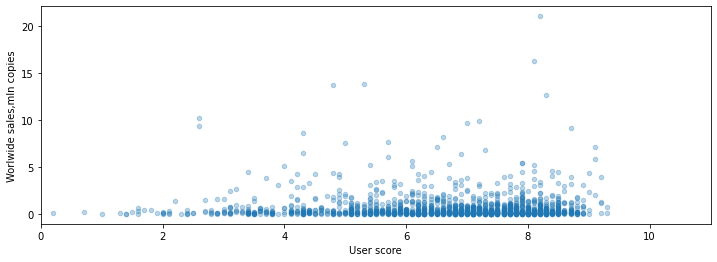

In [183]:
(
    act_data[act_data['user_score']!=55.5]
    .plot(y='worldwide_sales', x='user_score', kind='scatter', figsize=(12, 4), alpha=0.3, xlim = (0,11), xlabel='User score', ylabel='Worlwide sales,mln copies')
);

*As the data for the entire dataset shows, the correlation between the ratings of critics and users is not traceable and is not applicable for sales planning in the future.*

*4.6. Dependence between genres and sales*

*Let's look at the general distribution of games by genre. Let's choose the most profitable and unprofitable genres.*  

In [108]:
(
    act_data.groupby('genre')['worldwide_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
)

,genre,count,sum,median,mean
0,Action,1031,441.12,0.120,0.427856
8,Shooter,235,304.73,0.440,1.296723
7,Role-Playing,370,192.80,0.140,0.521081
10,Sports,268,181.07,0.240,0.675634
3,Misc,192,85.04,0.120,0.442917
4,Platform,85,61.00,0.210,0.717647
6,Racing,115,53.50,0.140,0.465217
2,Fighting,109,44.49,0.130,0.408165
9,Simulation,80,35.12,0.120,0.439000
1,Adventure,302,29.43,0.030,0.097450


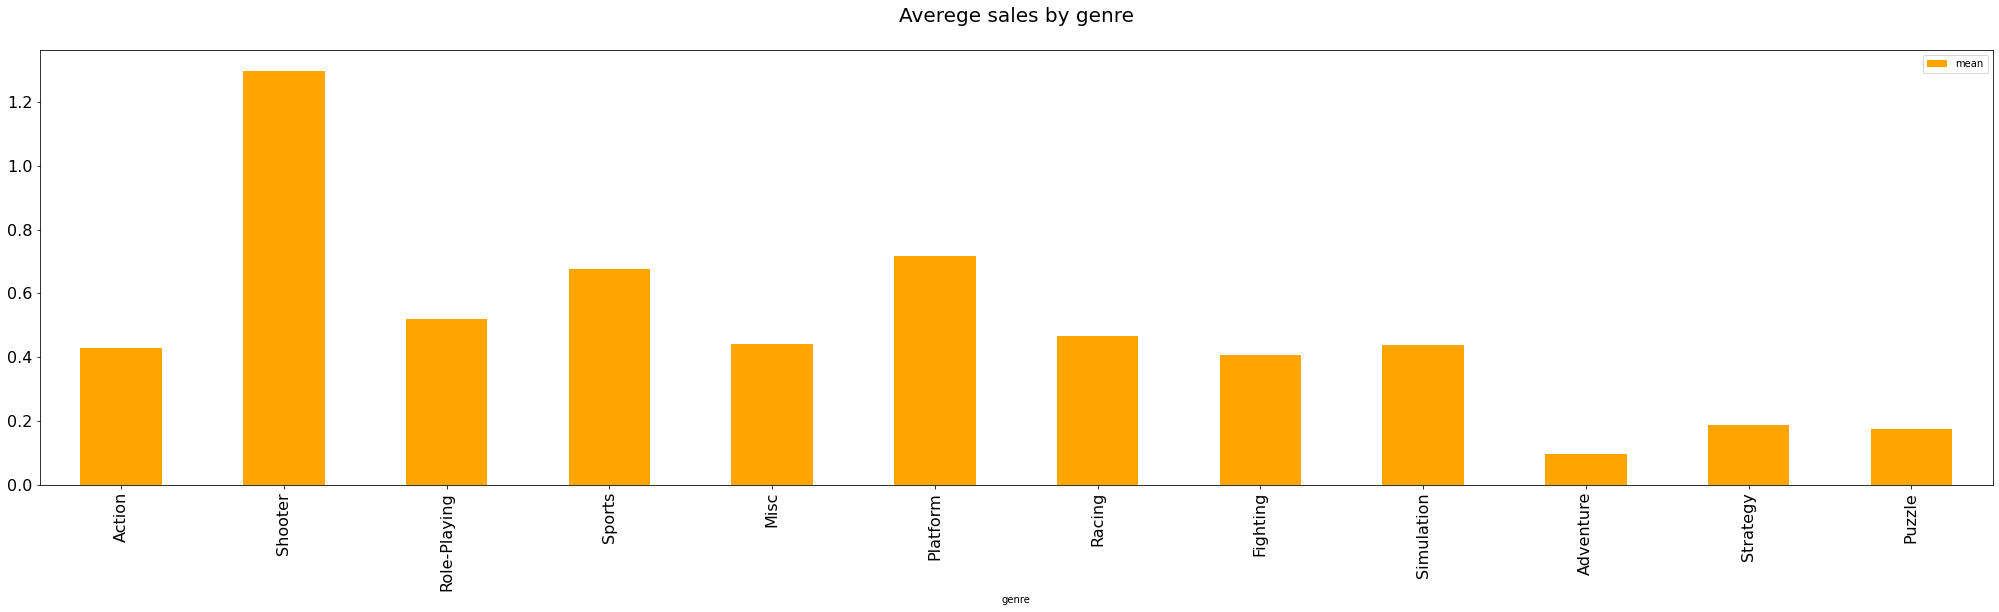

In [188]:
(
    act_data.groupby('genre')['worldwide_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
    .plot(kind='bar', x='genre', y = 'mean', figsize=(35,8),  legend = True,  color = 'orange', fontsize = 16)
    .set_title('Averege sales by genre' + "\n", size = 20, color = 'Black')
);

*As can be seen from the table and graph, the games in the action, sports, and shooter genres were the most sold in total. But if you look at the average and median values, then the leaders are shooters, platform, and sports. The outsiders are both in terms of the sum and the average and median values of adventure, puzzle, and strategy. Separately, we single out the adventure genre, which is the worst in terms of averages.*

*Let's illustrate the genre breakdown with a box plot*

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(0.0, 10.0)

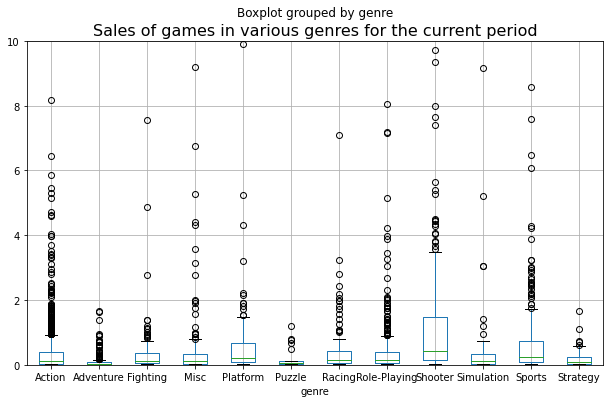

In [189]:
act_data.boxplot(column= 'worldwide_sales', by= 'genre', figsize=(10,6)).set_title('Sales of games in various genres for the current period' , fontsize = 16)
plt.ylim(0, 10)

*As can be seen from the graph, the Shooter genre is distinguished by more stable sales, and Sports and Platform can also be distinguished in terms of sales stability.*

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**<br/>
We performed an exploratory analysis of the data. We found out how long the platforms "live", and found the most suitable period of their "life". <br/> We determined this period as relevant for further planning of work and increasing sales of the store.<br/> We identified the most promising platforms and genres that affect sales.<br/> We looked at the dependence of user and critic ratings on game sales around the world. <br/>
Now we need to look at local markets to make portraits of users around the world and find differences in the localization of games.<br/>
We also need to test hypotheses by comparing the averages for the two platforms and the leaders in terms of total sales by genre.
    

## 5.Let's create a portrait of the user of each region ##

*5.1 Let's see what platforms, genres, and influences on the age rating are present in North America.*

In [190]:
(
    act_data.groupby('platform')['na_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)    

)

,platform,count,sum,median,mean
9,X360,292,140.05,0.170,0.479623
4,PS4,392,108.74,0.060,0.277398
3,PS3,493,103.38,0.050,0.209696
10,XOne,247,93.12,0.120,0.377004
0,3DS,396,55.31,0.000,0.139672
8,WiiU,147,38.10,0.110,0.259184
2,PC,250,19.12,0.000,0.076480
7,Wii,54,17.45,0.045,0.323148
6,PSV,411,10.98,0.000,0.026715
1,DS,31,4.59,0.000,0.148065


*In all respects, the X360 is in the lead, followed by the Wii. Also, note the high average for XOne.*	

In [191]:
(
    act_data
    .pivot_table(index='platform',columns='year_of_release', values='na_sales', aggfunc='sum')
    .reset_index()

)

year_of_release,platform,2012,2013,2014,2015,2016
0,3DS,17.11,15.56,12.33,6.17,4.14
1,DS,4.02,0.57,NaN,NaN,NaN
2,PC,8.01,3.88,3.51,2.36,1.36
3,PS3,39.88,41.45,16.39,4.99,0.67
4,PS4,NaN,10.13,34.75,42.37,21.49
5,PSP,0.13,0.00,0.00,0.00,NaN
6,PSV,5.94,2.52,1.98,0.39,0.15
7,Wii,10.89,4.48,1.59,0.43,0.06
8,WiiU,8.89,9.85,10.50,6.76,2.10
9,X360,58.39,53.36,20.25,7.36,0.69


*Interestingly, in recent years, generations have changed and the most popular in terms of sales are XOne and PS4, which confirms the promise of these platforms in the North American region.*

*Let's consider the genre distribution*

In [192]:
(
    act_data.groupby('genre')['na_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
)

,genre,count,sum,median,mean
0,Action,1031,177.84,0.02,0.172493
8,Shooter,235,144.77,0.20,0.616043
10,Sports,268,81.53,0.08,0.304216
7,Role-Playing,370,64.00,0.02,0.172973
3,Misc,192,38.19,0.01,0.198906
4,Platform,85,25.38,0.09,0.298588
2,Fighting,109,19.79,0.05,0.181560
6,Racing,115,17.22,0.04,0.149739
1,Adventure,302,8.92,0.00,0.029536
9,Simulation,80,7.97,0.00,0.099625


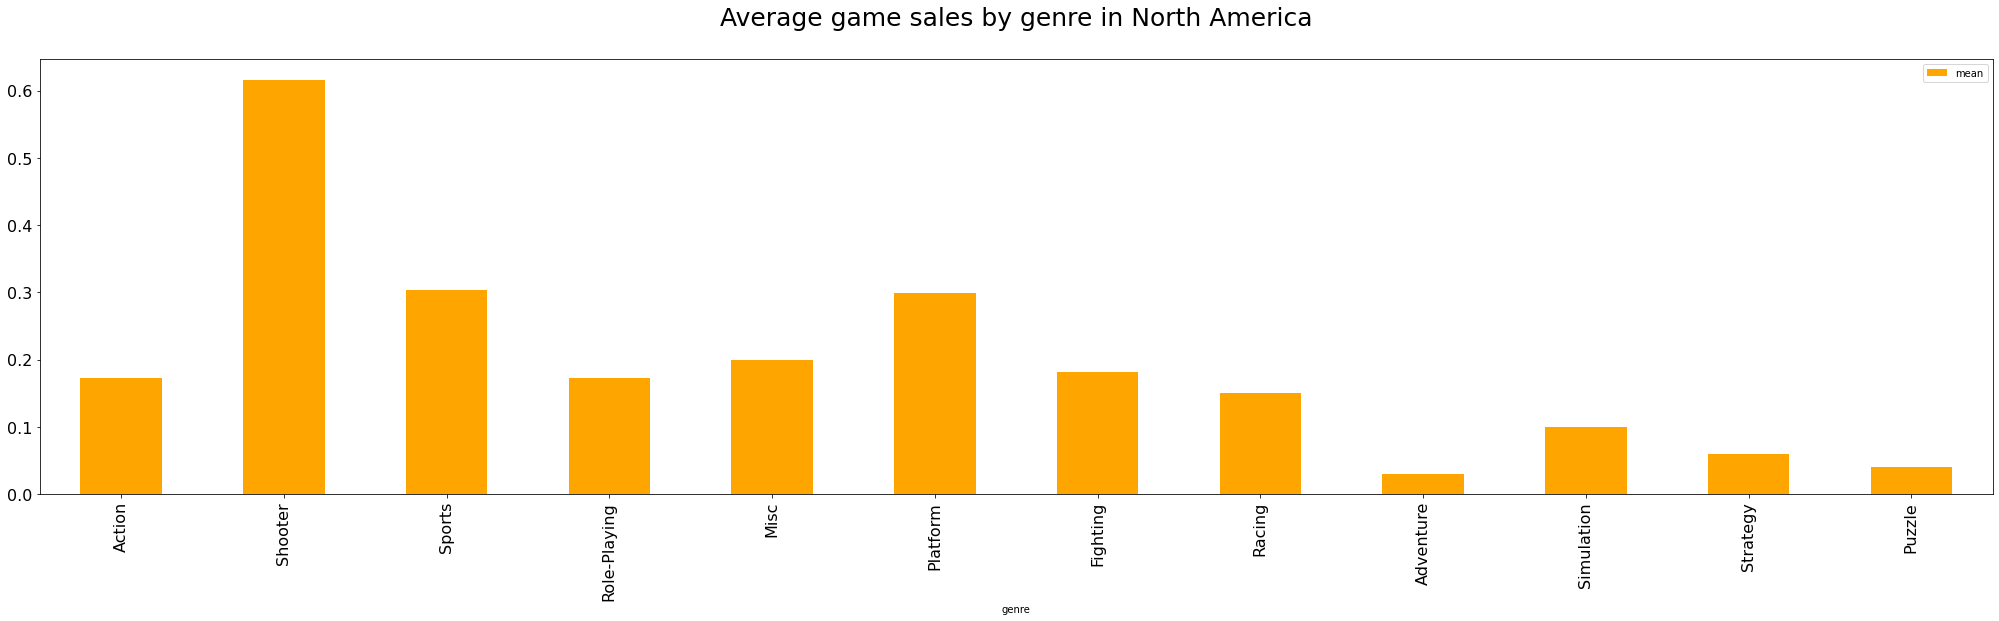

In [216]:
(
    act_data.groupby('genre')['na_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
    .plot(kind='bar', x='genre', y = 'mean', figsize=(35,8),  legend = True,  color = 'orange', fontsize = 16)
    .set_title('Average game sales by genre in North America' + "\n", size = 25, color = 'Black')
);

*It follows from the data that Action, Sports, and Shooter are in the lead. We note the popularity of the Platform genre in terms of average indicators.*

*Next,  we consider the dependence of sales on age groups by the rating from the ESRB organization.*

In [194]:
(
    act_data.groupby('rating')['na_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
)

,rating,count,sum,median,mean
2,M,498,231.57,0.155,0.465000
0,E,395,114.37,0.070,0.289544
4,unknown,1275,103.31,0.000,0.081027
1,E10+,306,75.70,0.130,0.247386
3,T,412,66.02,0.050,0.160243


*The most popular games are without age restrictions. According to the average and median values, we note the popularity of games for adults. Then follow games for teenagers and "10+".*

*5.2 Next, we look at preferences in the European market.*

In [195]:
(
    act_data.groupby('platform')['eu_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)    

)

,platform,count,sum,median,mean
4,PS4,392,141.09,0.08,0.359923
3,PS3,493,106.86,0.03,0.216755
9,X360,292,74.52,0.10,0.255205
10,XOne,247,51.59,0.07,0.208866
0,3DS,396,42.64,0.00,0.107677
2,PC,250,37.76,0.06,0.151040
8,WiiU,147,25.13,0.07,0.170952
7,Wii,54,11.92,0.04,0.220741
6,PSV,411,11.36,0.00,0.027640
1,DS,31,3.53,0.02,0.113871


*In all respects, the PS3 leads the way, followed by the X360. Also note the high average of the PS4.*

In [196]:
(
    act_data
    .pivot_table(index='platform',columns='year_of_release', values='eu_sales', aggfunc='sum')
    .reset_index()

)

year_of_release,platform,2012,2013,2014,2015,2016
0,3DS,11.68,14.84,8.73,5.06,2.33
1,DS,2.68,0.85,NaN,NaN,NaN
2,PC,12.40,7.39,8.87,5.57,3.53
3,PS3,39.05,42.27,18.24,6.04,1.26
4,PS4,NaN,11.05,46.50,51.76,31.78
5,PSP,0.25,0.17,0.00,0.00,NaN
6,PSV,5.26,2.57,2.45,0.69,0.39
7,Wii,5.99,3.34,1.86,0.62,0.11
8,WiiU,5.28,6.70,6.66,5.01,1.48
9,X360,32.00,27.03,11.28,3.50,0.71


*The most promising platform of recent years in Europe is PS4, followed by the growing popularity of XOne.*

*Let's consider genre preferences.*

In [197]:
(
    act_data.groupby('genre')['eu_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
)

,genre,count,sum,median,mean
0,Action,1031,159.34,0.020,0.154549
8,Shooter,235,113.47,0.170,0.482851
10,Sports,268,69.09,0.050,0.257799
7,Role-Playing,370,48.53,0.010,0.131162
6,Racing,115,27.29,0.090,0.237304
3,Misc,192,26.32,0.015,0.137083
4,Platform,85,21.41,0.080,0.251882
9,Simulation,80,14.55,0.030,0.181875
2,Fighting,109,10.79,0.020,0.098991
1,Adventure,302,9.46,0.000,0.031325


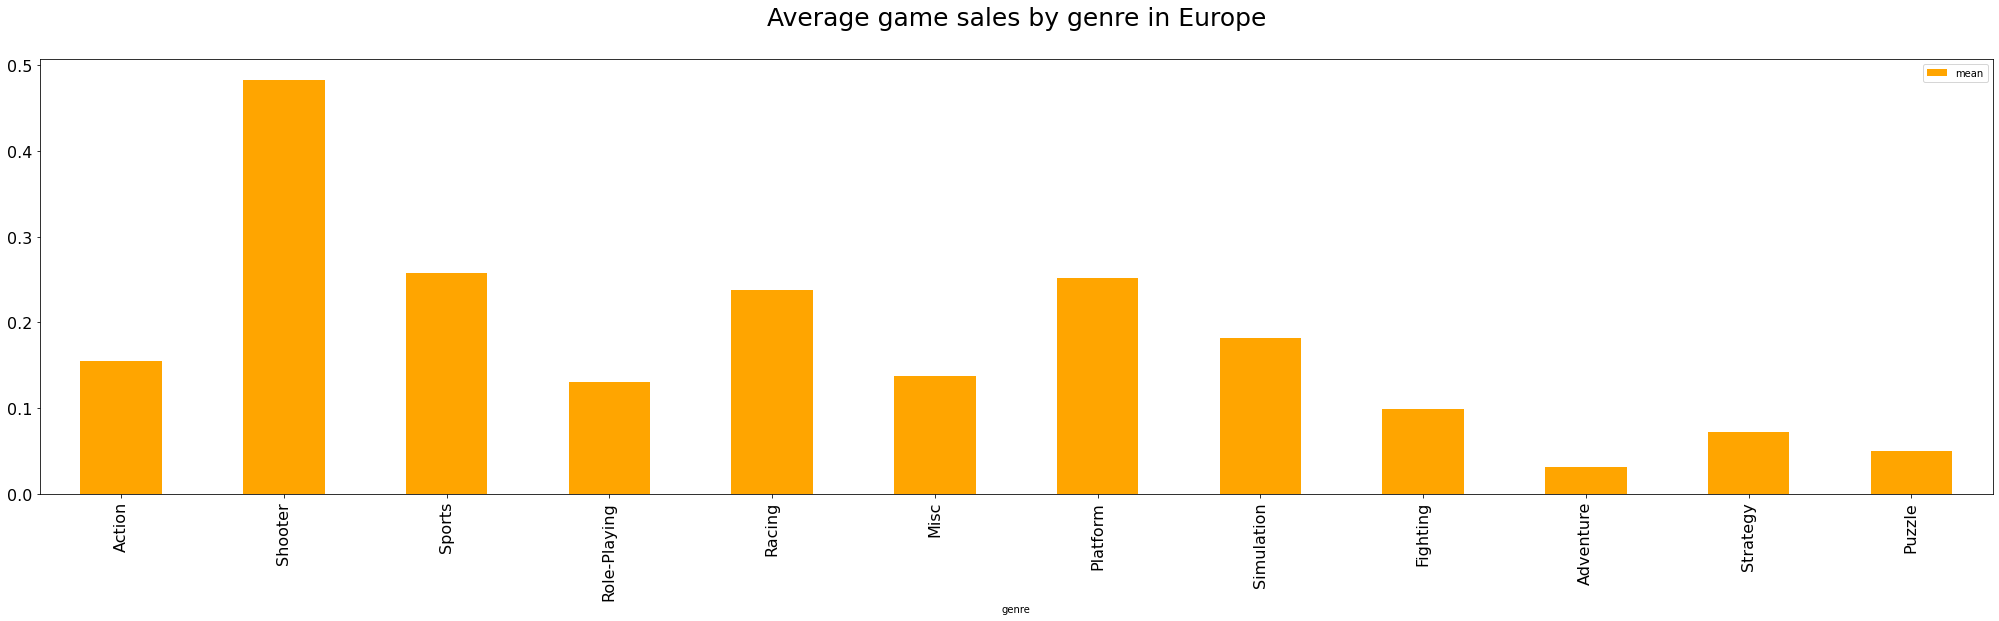

In [217]:
(
    act_data.groupby('genre')['eu_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
    .plot(kind='bar', x='genre', y = 'mean', figsize=(35,8),  legend = True,  color = 'orange', fontsize = 16)
    .set_title('Average game sales by genre in Europe' + "\n", size = 25, color = 'Black')
);

*Judging from the data, Action, Sports, Shooter are in the lead. We note the popularity of the Platform genre in terms of average indicators. The picture is similar to the situation in North America.*

In [199]:
(
    act_data.groupby('rating')['eu_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
)

,rating,count,sum,median,mean
2,M,498,193.96,0.13,0.389478
0,E,395,113.03,0.06,0.286152
4,unknown,1275,91.50,0.00,0.071765
1,E10+,306,55.37,0.11,0.180948
3,T,412,52.96,0.04,0.128544


*The most popular games without age restrictions. According to the average and median values, we note the popularity of games for adults. Then there are games for teenagers and "10+". A similar situation as in North America.*

*5.3 Let's consider the Japanese market.*

In [200]:
(
    act_data.groupby('platform')['jp_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)    

)

,platform,count,sum,median,mean
0,3DS,396,87.79,0.06,0.221692
3,PS3,493,35.29,0.03,0.071582
6,PSV,411,21.04,0.03,0.051192
4,PS4,392,15.96,0.01,0.040714
8,WiiU,147,13.01,0.00,0.088503
5,PSP,173,10.47,0.03,0.060520
1,DS,31,3.72,0.00,0.120000
7,Wii,54,3.39,0.00,0.062778
9,X360,292,1.57,0.00,0.005377
10,XOne,247,0.34,0.00,0.001377


*Nintendo-based platforms lead (DS and 3DS). 3DS also leads the way in terms of averages.*

In [201]:
(
    act_data
    .pivot_table(index='platform',columns='year_of_release', values='jp_sales', aggfunc='sum')
    .reset_index()

)

year_of_release,platform,2012,2013,2014,2015,2016
0,3DS,19.98,23.57,20.69,15.52,8.03
1,DS,3.72,0.00,NaN,NaN,NaN
2,PC,0.00,0.00,0.00,0.00,0.00
3,PS3,11.94,12.13,6.25,3.67,1.30
4,PS4,NaN,0.94,2.97,6.31,5.74
5,PSP,7.18,2.93,0.24,0.12,NaN
6,PSV,2.45,4.05,6.13,4.85,3.56
7,Wii,3.34,0.05,0.00,0.00,0.00
8,WiiU,2.13,3.57,3.19,3.45,0.67
9,X360,1.06,0.43,0.08,0.00,0.00


*The unequivocal leader in recent years in Japan DS3. It is worth noting the growing popularity of PS4, which is in line with global trends.*

*Let's consider genre preferences in the Japanese market.*

In [202]:
(
    act_data.groupby('genre')['jp_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
)

,genre,count,sum,median,mean
7,Role-Playing,370,65.44,0.06,0.176865
0,Action,1031,52.80,0.01,0.051212
3,Misc,192,12.86,0.02,0.066979
9,Simulation,80,10.41,0.00,0.130125
2,Fighting,109,9.44,0.03,0.086606
8,Shooter,235,9.23,0.00,0.039277
4,Platform,85,8.63,0.00,0.101529
1,Adventure,302,8.24,0.01,0.027285
10,Sports,268,8.01,0.00,0.029888
11,Strategy,71,2.88,0.00,0.040563


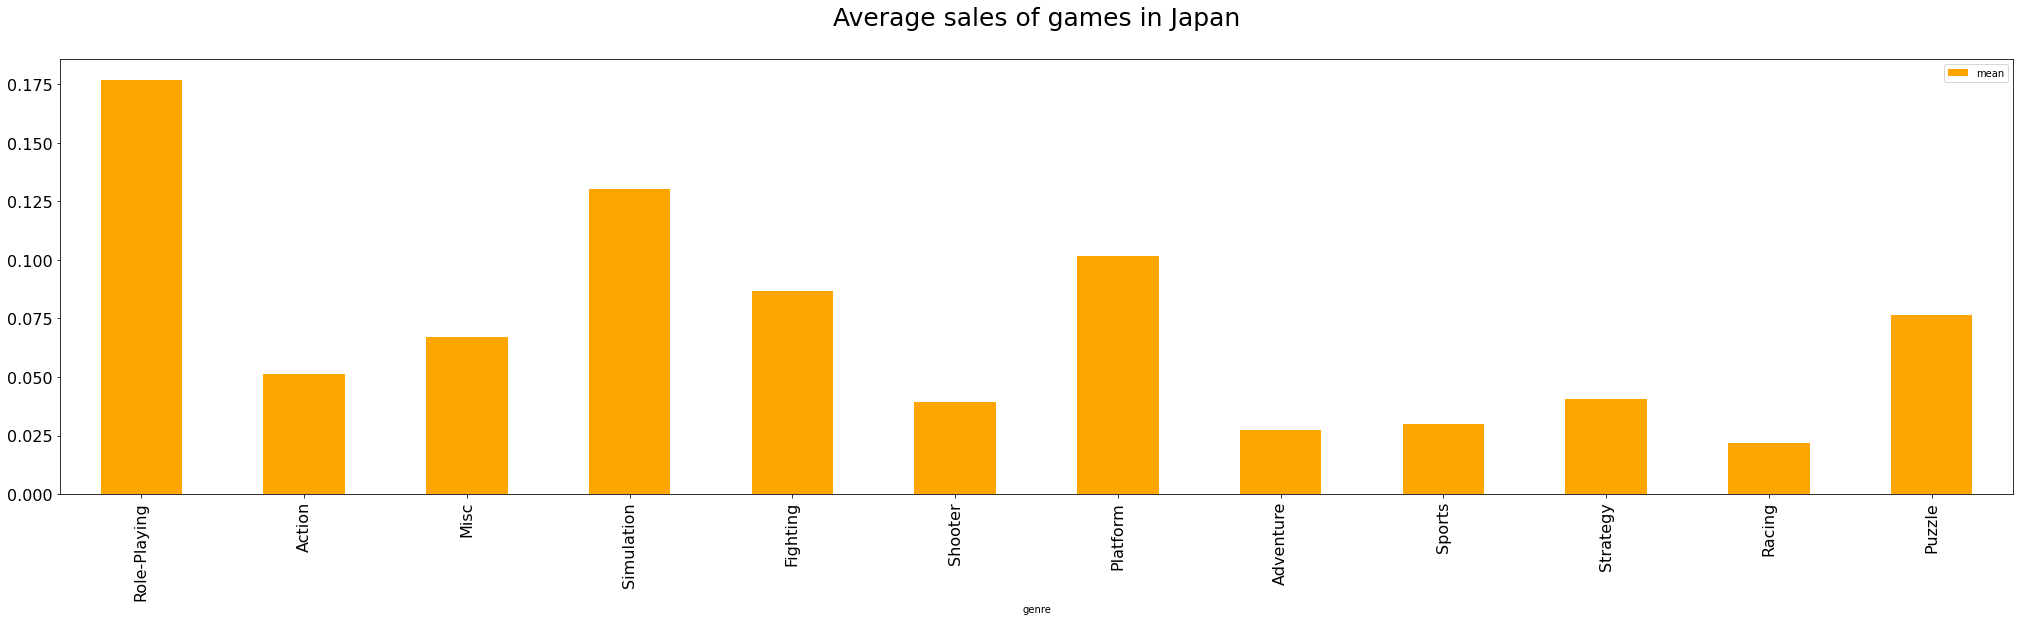

In [218]:
(
    act_data.groupby('genre')['jp_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
    .plot(kind='bar', x='genre', y = 'mean', figsize=(35,8),  legend = True,  color = 'orange', fontsize = 16)
    .set_title('Average sales of games in Japan' + "\n", fontsize = 25, color = 'Black')
);

*Leading Role-Playing, Action and Misc. In terms of average indicators, we note Platform and Fighting.*

In [204]:
(
    act_data.groupby('rating')['jp_sales']
    .agg(['count','sum','median','mean'])
    .reset_index()
    .sort_values('sum', ascending=False)
)

,rating,count,sum,median,mean
4,unknown,1275,108.84,0.03,0.085365
0,E,395,28.33,0.00,0.071722
3,T,412,26.02,0.01,0.063155
2,M,498,21.20,0.00,0.042570
1,E10+,306,8.19,0.00,0.026765


*Games with an indefinite rating are in the lead. Next, come games for everyone and teenagers*

*5.4 Perspective platforms in regions.*

*Let's build sales graphs for the most promising platforms in North America, Europe, and Japan, for comparison*

''

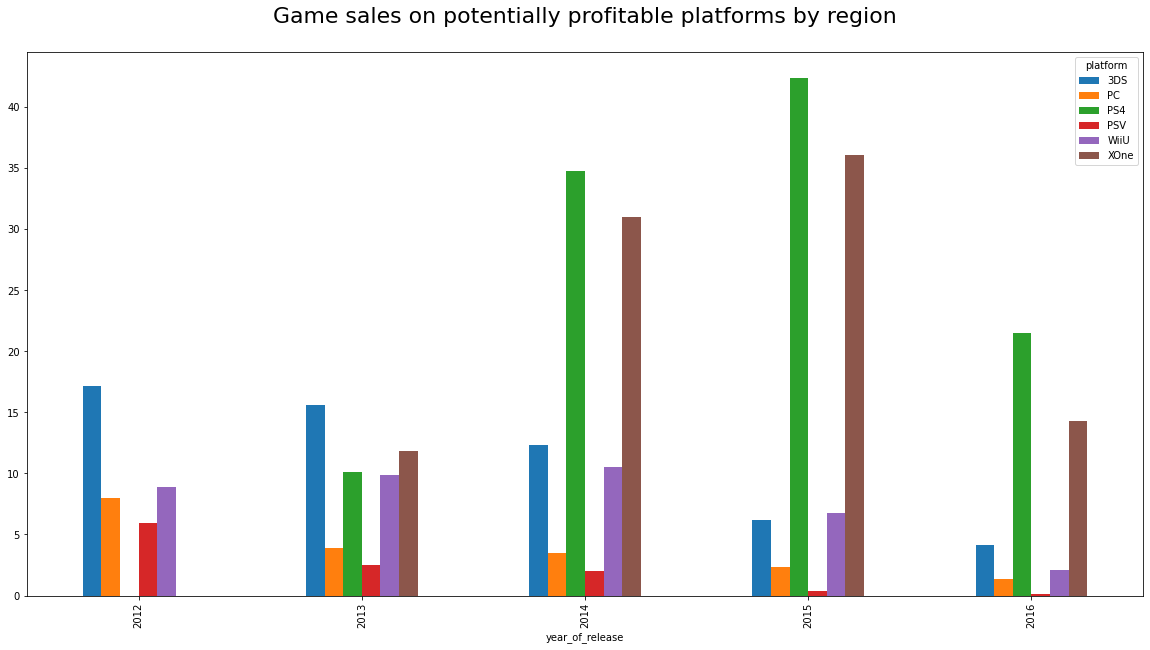

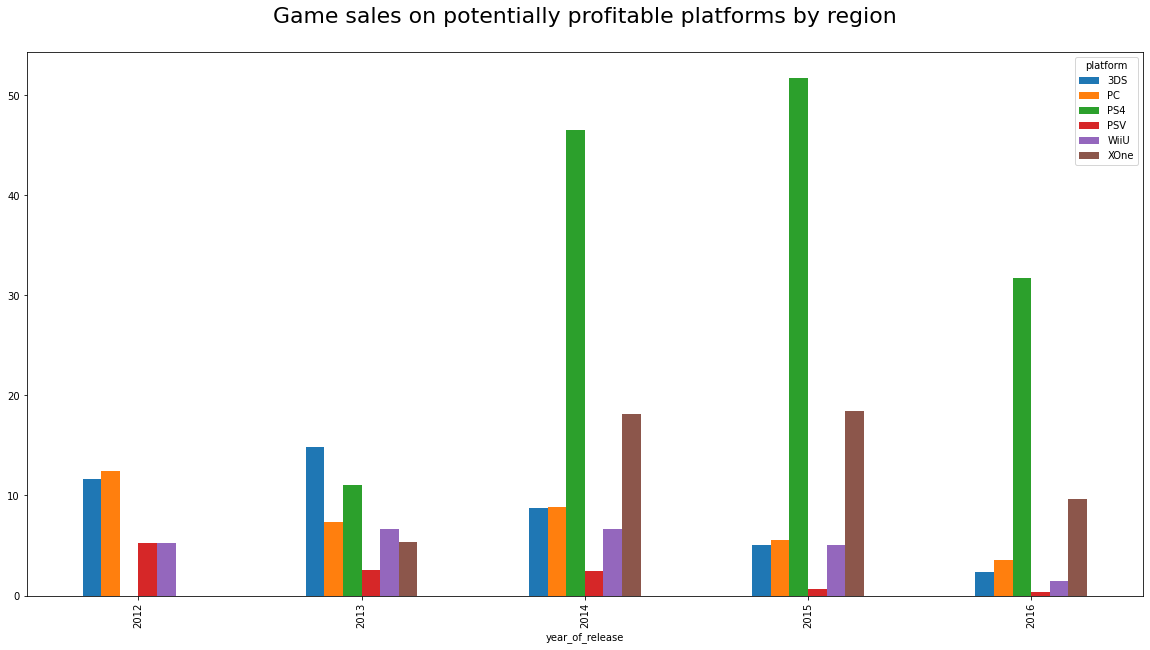

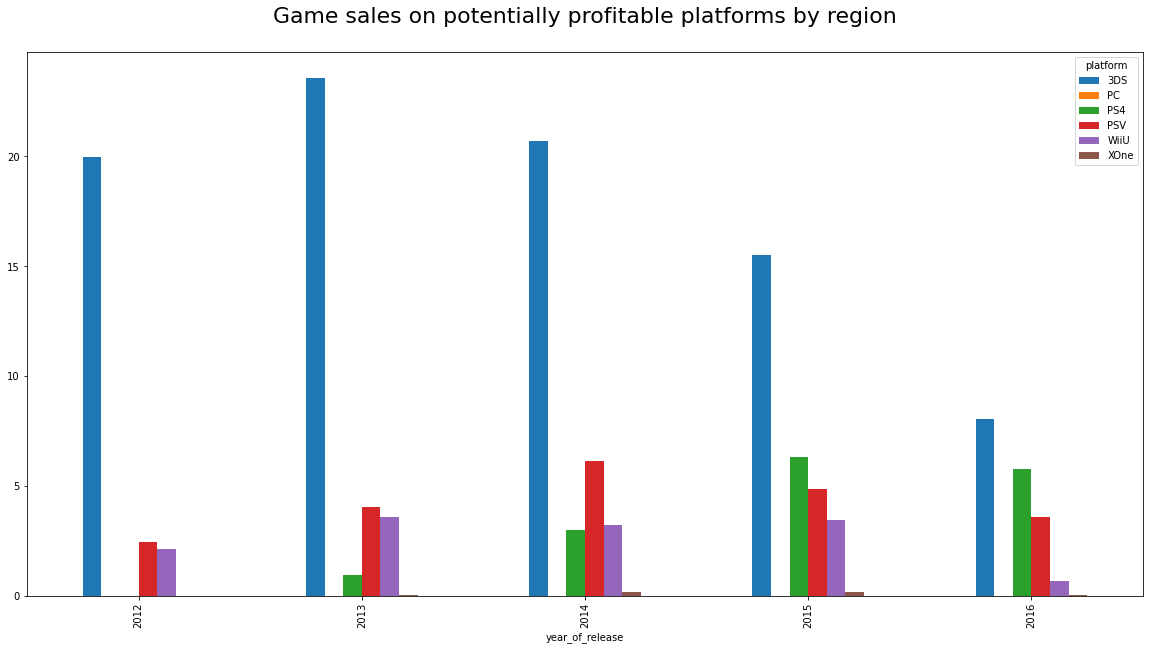

In [219]:
region_sales= ['na_sales', 'eu_sales','jp_sales']

act_pltf = ['PS4', 'WiiU', 'XOne', 'PSV', '3DS','PC']
for region in region_sales:
    sales_platform = act_data.query('platform == @act_pltf').pivot_table(index='year_of_release',
                                            values=region,
                                            columns='platform',
                                            aggfunc='sum')
 
    sales_platform.plot(figsize=(20,10), kind='bar').set_title('Game sales on potentially profitable platforms by region' + "\n", fontsize = 22, color = 'Black')
;


*As can be seen from the graphs, the undisputed leader in the European and American markets, as previously stated, is PS4, then comes Xone, but for Japan, the leader is DS3*  

*Let's build graphs for the Top 5 platforms and genres depending on the region, for this we first group the rest of the genres and platforms in Other*

In [206]:
top_g = ['Role-Playing', 'Action', 'Shooter',  'Sports', 'Platform']

In [207]:
def categorize_genre(row):
    for g in top_g:
        try:
            if g in row:
                return g
        except:
            return 'Other'

In [208]:
act_data['top_genre'] = act_data['genre'].apply(categorize_genre)

In [209]:
act_data['top_genre']  = act_data['top_genre'].fillna('Other')

In [210]:
pltf =['PS4', 'XOne', 'WiiU', '3DS', 'PC']
def categorize_platform(row):
    for p in pltf:
        try:
            if p in row:
                return p
        except:
            return 'Other'

In [211]:
act_data['top_platform'] = act_data['platform'].apply(categorize_platform)

In [212]:
act_data['top_platform'] = act_data['top_platform'].fillna('Other')

In [213]:
act_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,worldwide_sales,top_genre,top_platform
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,Action,Other
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,Action,Other
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,55.5,55.5,unknown,14.63,Shooter,PS4
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,55.5,55.5,unknown,14.60,Role-Playing,3DS
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,Shooter,Other


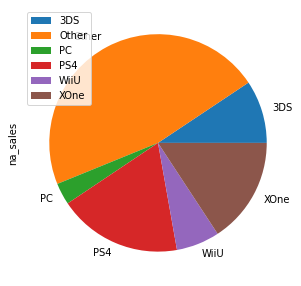

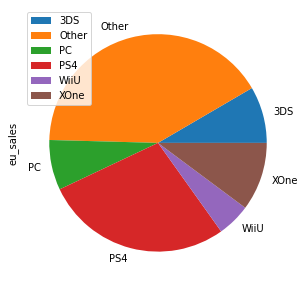

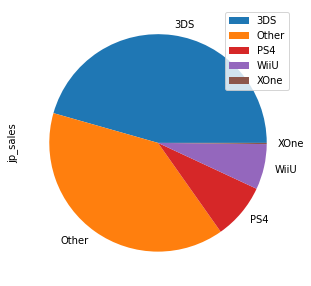

In [214]:
for region in region_sales:
    sales_platform = act_data.pivot_table(index='top_platform',
                                            values=region,
                                            aggfunc='sum')
 
    sales_platform.plot(figsize=(5,5), kind='pie', subplots=True)
    

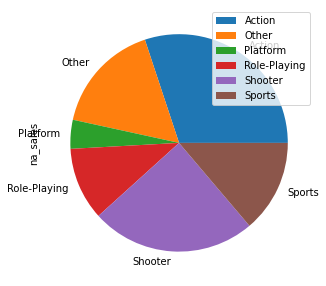

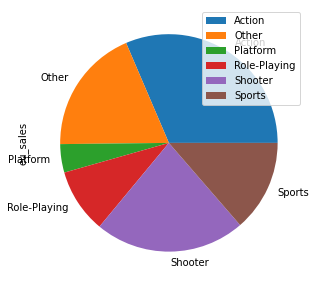

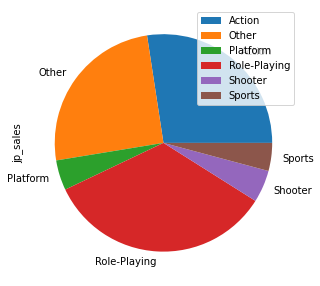

In [215]:
for region in region_sales:
    sales_platform = act_data.pivot_table(index='top_genre',
                                            values=region,
                                            aggfunc='sum')
 
    sales_platform.plot(figsize=(5,5), kind='pie', subplots=True)

*The pie charts clearly show that in terms of platforms, XBox is preferred in America, PlayStation in Europe, and Nintendo in Japan. <br>
The genre preferences of Europe and America are little separated, while Japan stands apart with a love of role-playing games.*

<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**<br/>
1. Users in North America have preferred X360 or Wii over the past 10 years. In recent years, the XOne has taken the lead, as has the PS4. The favorite genres of Americans are Action, Sports, and Shooter. We also note the popularity of the Platform genre in terms of average sales. The most popular games without age restrictions. According to the average and median values, we note the popularity of games for adults. Then there are games for teenagers and "10+<br/>
2. The European game market differs little from the North American one. However, in the past 10 years, the European user preferred PS3, and X360 settled in second place. Currently, PS4 is in the lead, and then XOne. The favorite genres of Europeans are the same as those of Americans. By age group - the picture is the same as in North America.
3. But the Japanese market is fundamentally different from the markets of the other two regions: The most popular platform for the current period here was and is Nintendo (DS and 3DS). It is worth noting the growing popularity of the PS4, but the XBox did not conquer this market. Japanese favorite genres are Role-Playing, Action, and Misc. In terms of average sales, Platform and Fighting stand out. The age audience of the Japanese is undefined, which may be due to the peculiarities of certification of local games, also among the leaders of the game for all ages and Teenagers, but the adult audience is not impressed by computer games. 

## Hypothesis testing ##

6.1 First, let's test the hypothesis that PC users and Xbox One users love them equally because if they differ, they will have different audiences and possibly sales, which will also confirm the conclusions from the exploratory analysis. We formulate the most conservative scenario in the form of a null hypothesis. We take a significance level of 0.05 since the indicators should differ quite reliably <br/>
```
H_0: The average user ratings of the Xbox One and PC platforms are the same`
H_a: Average user ratings for Xbox One and PC platforms differ`
alpha = 0.05
```

In [224]:
alpha = .05 
mean_score_XOne = act_data[(act_data['platform'] =='XOne')&(act_data['user_score']!=55.5)]['user_score']
mean_score_PC = act_data[(act_data['platform'] =='PC')&(act_data['user_score']!=55.5)]['user_score']
results = st.ttest_ind(
    mean_score_XOne, 
   mean_score_PC, 
    equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis") 

0.5489537965134912
Failed to reject the null hypothesis


In [225]:
print (
        "Average user rating for XOne sample =",
    act_data[(act_data['platform'] =='XOne')&(act_data['user_score']!=55.5)]['user_score'].mean()
)
print (
        "Average rating of users by PC sample =",
    act_data[(act_data['platform'] =='PC')&(act_data['user_score']!=55.5)]['user_score'].mean()
)


Average user rating for XOne sample = 6.521428571428572
Average rating of users by PC sample = 6.4286407766990274


6.2 Now let's test the hypothesis that users like the Action genre more than Sports, since these are the two most popular genres, and it is important for us to understand if there is a difference for users. We formulate the most conservative scenario in the form of a null hypothesis. We take a significance level of 0.05 since the indicators should differ quite reliably<br/>
```
H_0: Average user ratings for Action and Sports are different`
H_a: The average user ratings of the Action and Sports genres do not differ`
alpha = 0.05
```

In [226]:
alpha = .05 
mean_score_action = act_data[(act_data['genre'] =='Action')&(act_data['user_score']!=55.5)]['user_score']
mean_score_sports = act_data[(act_data['genre'] =='Sports')&(act_data['user_score']!=55.5)]['user_score']
results = st.ttest_ind(
    mean_score_action, 
   mean_score_sports, 
    equal_var = False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Failed to reject the null hypothesis")
else:
    print("Rejecting the null hypothesis")

4.24307776572644e-20
Failed to reject the null hypothesis


In [228]:
print (
        "Average user rating for the selection of the genre  Action=",
    act_data[(act_data['genre'] =='Action')&(act_data['user_score']!=55.5)]['user_score'].mean()
)
print (
        "Average user rating for the selection of the Sports genre =",
    act_data[(act_data['genre'] =='Sports')&(act_data['user_score']!=55.5)]['user_score'].mean()
)


Average user rating for the selection of the genre  Action= 6.825047801147227
Average user rating for the selection of the Sports genre = 5.455897435897437


<div style="border:solid green 2px; padding: 20px">
    
**Conclusions:**<br/>
1. We have proven that the average user ratings of the Xbox One and PC platforms do not differ, and therefore the sales of games for these platforms are likely to be similar, however, we must remember that there is no linear relationship between sales and user ratings.<br/>
2. We have proven that the average user ratings of the Action and Sports genres are different, which confirms the largest sale in the Action genre, however, we must remember that there is no linear relationship between sales and user rating.

##General conclusion ##

<div style="border:solid pink 2px; padding: 20px">
    
<br/>1. For most platforms, the sale of games, and hence their popularity, grows in the first five years, then, during the next 5-6 years, there is a decline, and approximately two to three years after peak sales, the generation of the platform is replaced, as in the case of the PlayStation; or a competitor like the X-box comes out. Thus, the actual life period of platforms is 10-11 years.
<br/>2. The above is not typical for games on personal computers; interest in them has been stable throughout the entire observation period since 1985.
<br/>3. The most potentially profitable platforms in terms of game sales are PS4, XOne, WiiU, PSV, 3DS, and PC, while PS4 games are already at the peak of sales, XOne is potentially its main competitor, and PC games sales are stable, as mentioned earlier, and here with 3DS recession is already observed.
<br/>4. The ratings of users and critics do not have a direct relationship with the sales of games, the linear relationship between them is very weak, so you should not pay attention to the rating directly when choosing potentially sold games.
<br/>5. In total, action, sports, and shooter games are the most sold. But if you look at the average and median values ​​of sales, then the leaders are shooters, platform, and sports. The outsiders both in terms of the sum and the average and median values ​​of adventure, puzzle, and strategy. Separately, we single out the adventure genre, which is the worst in terms of average sales, while the shooter genre is distinguished by sales stability.
<br/>6.Users in North America over the past 10 years have preferred X360 or Wii. In recent years, the XOne has taken the lead, as has the PS4. The favorite genres of Americans are Action, Sports, and Shooter. We also note the popularity of the Platform genre in terms of average sales. The most popular games without age restrictions. According to the average and median values, we note the popularity of games for adults. Then there are games for teenagers and "10+".
<br/>7. The European game market differs little from the North American one. However, the European user in the last 10 years preferred the PS3, and the X360 settled in second place. Currently, PS4 is in the lead, and then XOne. The favorite genres of Europeans are the same as those of Americans. By age group - the picture is the same as in North America.
<br/>8. But the Japanese market is fundamentally different from the markets of the other two regions: the most popular platform for the current period here was and is Nintendo (DS and 3DS). It is worth noting the growing popularity of the PS4, but the XBox did not conquer this market. Japanese favorite genres are Role-Playing, Action, and Misc. In terms of average sales, Platform and Fighting stand out. The age audience of the Japanese is indefinite, which may be due to the peculiarities of certification of local games, also among the leaders of the game for all ages and teenagers, but the adult audience is not impressed by computer games.
<br/>9. So, to increase sales in 2017, the store needs to focus its advertising campaign on the PS4 and XOne platforms, with action, sports, and shooter genres, and an age rating for everyone and an adult audience.
<br/>10. An advertising campaign in North America should be carried out with an emphasis on games in the genre of Action or Shooter, for the XBoxOne platform with a rating without age restrictions or for adults.
<br/>11. We carry out an advertising campaign in Europe for games on the PlayStation4 also in the genre of Action or Shooter with a rating without age restrictions or for adults.
<br/>12. The advertising company in Japan will be refocused on the Nintendo DS3, with an emphasis on the RPG genre.